**company_financial_data:** Dataframe that has describes various metrics of each company.<br>
**industry_name:**Datframe that has Industry name and code<br>
**det_industry:** Dataframe that has description of each company<br>
**new_fin_data:**company_financial_data with industry name<br>
**sales_records_null:**Records where sales value are null<br>
**pat_records_null:**Records where profit after tax are null<br>
**ind_profit_perc:**Mean profit% in each industry

In [ ]:
!pip install openpyxl
!pip install statsmodels

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,plot_tree
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.tree import export_text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the excel files
company_financial_data=pd.read_csv('/content/drive/MyDrive/accounting analytics/10-K data/10-K data.csv')
industry_name=pd.read_excel('/content/drive/MyDrive/accounting analytics/10-K data/10-K industry data.xlsx')


In [ ]:
company_financial_data.head()

firmcode  year  month  day       date    sales  employee_salaries  \
0    456536  2015     12   31  31dec2015   1376.8                9.9   
1    300030  2017     12   31  31dec2017  36594.7             1733.7   
2     32035  2020     12   31  31dec2020      0.9                NaN   
3    140699  2020     12   31  31dec2020      NaN                NaN   
4     98687  2018     12   31  31dec2018    306.5                9.0   

   selling_distn_exp  advt_exp  rnd_exp  ...  total_asset  net_fixed_asset  \
0                6.5       NaN      NaN  ...        135.5            126.4   
1              613.8      27.9      NaN  ...      30303.9          17414.1   
2                NaN       NaN      NaN  ...        248.4              0.5   
3                NaN       NaN      NaN  ...          6.2              3.4   
4               28.4       NaN      NaN  ...         93.2             23.8   

   gross_fixed_asset  current_assets  investments  inventories  \
0              169.1             7.4          NaN          2.0   
1            19425.7          9171.7          NaN       8459.6   
2                0.5           239.9          NaN          0.8   
3                3.4             NaN          NaN          NaN   
4               46.8            61.5          NaN         33.8   

   accounts_receivanles  cash_balance  cashflow_from_oper  industry_id  
0                   0.2           1.5                -1.9            1  
1                 233.9          12.4              2116.3            1  
2                   NaN           0.1                 0.6            1  
3                   NaN           NaN                 0.0            1  
4                  16.0           0.7                 5.1            1  

[5 rows x 32 columns]

In [ ]:
industry_name.head()

Industry ID         Industry name
0            1           Agriculture
1            2              Forestry
2            5           Coal mining
3            6  Petroleum extraction
4            7      Metal ore mining

In [ ]:
industry_name.rename(columns={'Industry ID':'industry_id'}, inplace=True)
new_fin_data=pd.merge(company_financial_data, industry_name, how='left', on='industry_id')

In [ ]:
new_fin_data.head()

firmcode  year  month  day       date    sales  employee_salaries  \
0    456536  2015     12   31  31dec2015   1376.8                9.9   
1    300030  2017     12   31  31dec2017  36594.7             1733.7   
2     32035  2020     12   31  31dec2020      0.9                NaN   
3    140699  2020     12   31  31dec2020      NaN                NaN   
4     98687  2018     12   31  31dec2018    306.5                9.0   

   selling_distn_exp  advt_exp  rnd_exp  ...  net_fixed_asset  \
0                6.5       NaN      NaN  ...            126.4   
1              613.8      27.9      NaN  ...          17414.1   
2                NaN       NaN      NaN  ...              0.5   
3                NaN       NaN      NaN  ...              3.4   
4               28.4       NaN      NaN  ...             23.8   

   gross_fixed_asset  current_assets  investments  inventories  \
0              169.1             7.4          NaN          2.0   
1            19425.7          9171.7          NaN       8459.6   
2                0.5           239.9          NaN          0.8   
3                3.4             NaN          NaN          NaN   
4               46.8            61.5          NaN         33.8   

   accounts_receivanles  cash_balance  cashflow_from_oper  industry_id  \
0                   0.2           1.5                -1.9            1   
1                 233.9          12.4              2116.3            1   
2                   NaN           0.1                 0.6            1   
3                   NaN           NaN                 0.0            1   
4                  16.0           0.7                 5.1            1   

   Industry name  
0    Agriculture  
1    Agriculture  
2    Agriculture  
3    Agriculture  
4    Agriculture  

[5 rows x 33 columns]

In [ ]:
print(new_fin_data.shape)
new_fin_data.isnull().sum()

(332474, 33)


firmcode                     0
year                         0
month                        0
day                          0
date                         0
sales                    79913
employee_salaries        73628
selling_distn_exp       140231
advt_exp                227491
rnd_exp                 311673
interest_exp            106422
provision_exp           289090
depreciation             82278
cogs                         0
porift_after_tax         22709
ebidta                   22407
ebit                     22407
total_liabilities           20
current_liab             19563
accounts_payable         87084
debt                     73260
debt_to_equity           54019
total_asset               2705
net_fixed_asset          50243
gross_fixed_asset        52526
current_assets           35647
investments             292987
inventories             140586
accounts_receivanles    101434
cash_balance            123358
cashflow_from_oper       90977
industry_id                  0
Industry name           117139
dtype: int64

In [ ]:
#removing records where sales and profit after tax are null
columns_to_check = ['sales', 'porift_after_tax']
new_fin_data = new_fin_data[~(new_fin_data[columns_to_check].isnull().all(axis=1))]

In [ ]:
# removing null values from sales
sales_records_null=new_fin_data['sales'].isnull()
new_fin_data = new_fin_data.dropna(subset=['sales'])

In [ ]:
pat_records_null=new_fin_data['porift_after_tax'].isnull()
new_fin_data=new_fin_data.dropna(subset=['porift_after_tax'])

In [ ]:
#removing records where ebidta is 105% greater than sales
new_fin_data = new_fin_data[~(new_fin_data['ebidta'] > 1.05 * new_fin_data['sales'])]

In [ ]:
#filling in missing values of advt_exp, selling_distn_exp, rnd_exp, provision_exp, depreciation,interest_exp, investments with 0
columns_to_fill=['advt_exp','selling_distn_exp','rnd_exp','provision_exp','depreciation','investments','interest_exp']
new_fin_data[columns_to_fill]=new_fin_data[columns_to_fill].fillna(0)

<ipython-input-14-a587d6f64ee3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fin_data[columns_to_fill]=new_fin_data[columns_to_fill].fillna(0)


In [ ]:
new_fin_data['date']=pd.to_datetime(new_fin_data['date'], format='%d%b%Y')
new_fin_data.sort_values(by=['industry_id', 'firmcode', 'year'], ascending=[True, True, True], inplace=True)

<ipython-input-15-092cff7c1d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fin_data['date']=pd.to_datetime(new_fin_data['date'], format='%d%b%Y')


In [ ]:
#Filling missing values in employee_salaries,  total_liabilities, current_liab, accounts_payable, debt, total_asset, net_fixed_asset, gross_fixed_asset, current_assets
new_fin_data['flag'] = ((new_fin_data['firmcode'] == new_fin_data['firmcode'].shift(1)) & (new_fin_data['industry_id'] == new_fin_data['industry_id'].shift(1)))
columns_to_fill = ['employee_salaries', 'total_liabilities' , 'current_liab' , 'accounts_payable' , 'debt' , 'total_asset' , 'net_fixed_asset', 'gross_fixed_asset', 'current_assets']
for column in columns_to_fill:
    new_fin_data.loc[new_fin_data['flag'], column] = new_fin_data.loc[new_fin_data['flag'], column].ffill()
new_fin_data.drop('flag', axis=1, inplace=True)


In [ ]:
#filling missing values with mean with respect firmcode and industry id
columns_to_fill=new_fin_data.select_dtypes(include=['number']).columns
for column in columns_to_fill:
  group_avg = new_fin_data.groupby(['industry_id', 'firmcode'])[column].transform('mean')
  new_fin_data[column] = new_fin_data[column].fillna(group_avg)

In [ ]:
print(new_fin_data.shape)
new_fin_data.isnull().sum()

(240420, 33)


firmcode                    0
year                        0
month                       0
day                         0
date                        0
sales                       0
employee_salaries         788
selling_distn_exp           0
advt_exp                    0
rnd_exp                     0
interest_exp                0
provision_exp               0
depreciation                0
cogs                        0
porift_after_tax            0
ebidta                      0
ebit                        0
total_liabilities           0
current_liab              208
accounts_payable         1769
debt                      728
debt_to_equity          11207
total_asset                 9
net_fixed_asset           678
gross_fixed_asset         689
current_assets           1224
investments                 0
inventories             45374
accounts_receivanles    10814
cash_balance            24386
cashflow_from_oper      17762
industry_id                 0
Industry name           71712
dtype: int64

In [ ]:
new_fin_data=new_fin_data.drop(['Industry name'],axis=1)
new_fin_data.fillna(0,inplace=True)

In [ ]:
print(new_fin_data.shape)
new_fin_data.isnull().sum()

(240420, 30)


firmcode                0
year                    0
month                   0
day                     0
date                    0
sales                   0
employee_salaries       0
selling_distn_exp       0
advt_exp                0
rnd_exp                 0
interest_exp            0
provision_exp           0
depreciation            0
cogs                    0
porift_after_tax        0
ebidta                  0
ebit                    0
total_liabilities       0
current_liab            0
accounts_payable        0
debt                    0
debt_to_equity          0
total_asset             0
net_fixed_asset         0
gross_fixed_asset       0
current_assets          0
investments             0
inventories             0
accounts_receivanles    0
industry_id             0
dtype: int64

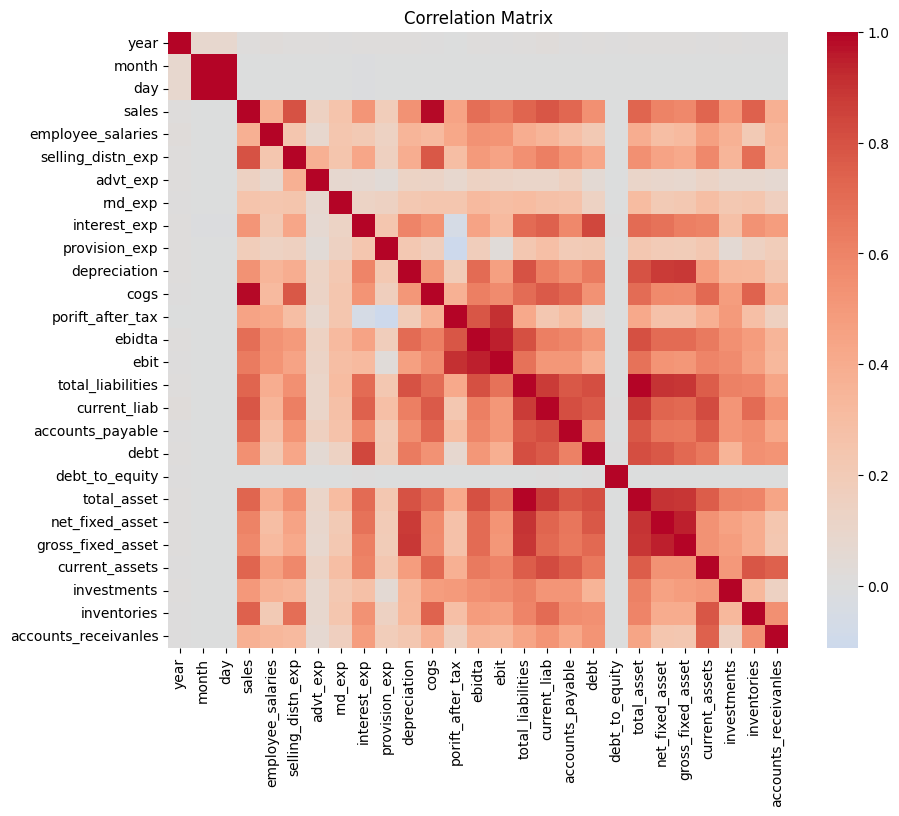

In [ ]:
numerical_df=new_fin_data.select_dtypes(include=['number'])
numerical_df=numerical_df.drop(columns=['firmcode','industry_id'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#creating profit % column profit%=(profit/sales) * 100 and replacing infinity values with 0
new_fin_data['profit%']=new_fin_data['porift_after_tax']/new_fin_data['sales']*100
new_fin_data['profit%']=new_fin_data['profit%'].replace([np.inf, -np.inf], 0)

In [ ]:
ind_profit_perc=new_fin_data.groupby(['industry_id'])['profit%'].mean()
ind_profit_perc=ind_profit_perc.to_frame()
ind_profit_perc.reset_index(inplace=True)
ind_profit_perc['industry_id'] = ind_profit_perc['industry_id'].astype(str)
ind_profit_perc.sort_values(by='profit%',ascending=False,inplace=True)


In [ ]:
ind_profit_perc.head()

industry_id    profit%
54          65  16.541353
32          37   5.916626
8           12  -0.423568
1            2  -1.524672
76          96  -2.452444

In [ ]:
ind_profit_perc.tail()

industry_id      profit%
58          70  -620.597143
64          77  -644.432961
62          74  -650.915243
30          35 -1626.716351
53          64 -4456.929896

In [ ]:
ind_profit_year=new_fin_data.groupby(['industry_id','year'])['profit%'].mean()
ind_profit_year=ind_profit_year.to_frame()
ind_profit_year.reset_index(inplace=True)

In [ ]:
industry_name[industry_name['industry_id']==37]

industry_id     Industry name
32           37  Sewage treatment

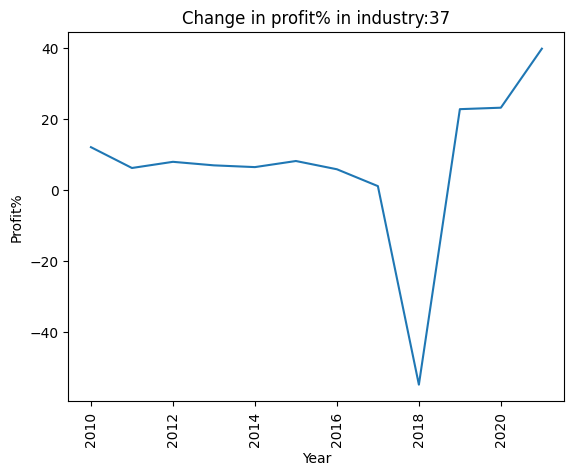

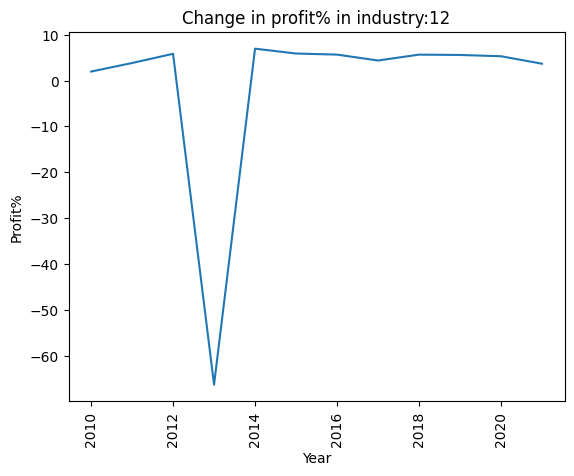

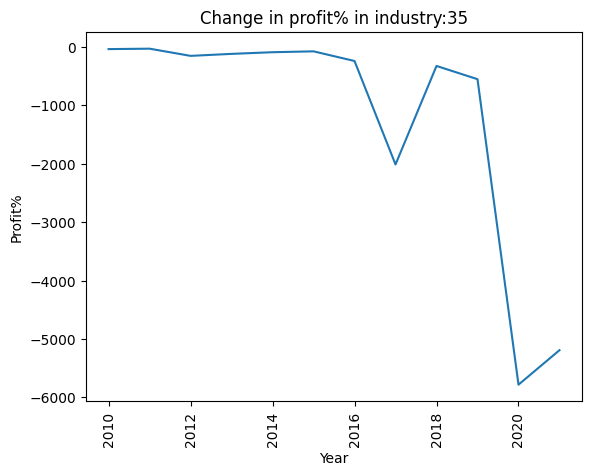

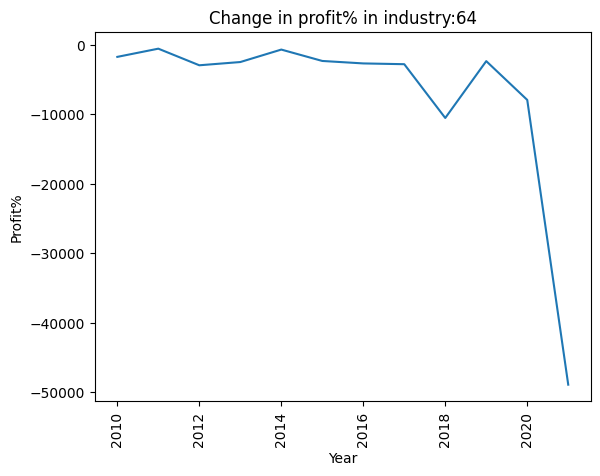

In [ ]:
industries=[37,12,35,64]
for industry in industries:
  top_ind=ind_profit_year[ind_profit_year['industry_id']==industry]
  sns.lineplot(x='year', y='profit%',data=top_ind)
  plt.title(f'Change in profit% in industry:{industry}')
  plt.xlabel('Year')
  plt.ylabel('Profit%')
  plt.xticks(rotation=90)
  plt.show()

<ipython-input-29-8dd9474e82c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sewage_industry.drop(['firmcode','month','day','date','industry_id'],axis=1,inplace=True)
<ipython-input-29-8dd9474e82c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sewage_industry[column]=sewage_industry[column]/sewage_industry['sales']
<ipython-input-29-8dd9474e82c6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

<Figure size 1200x800 with 0 Axes>

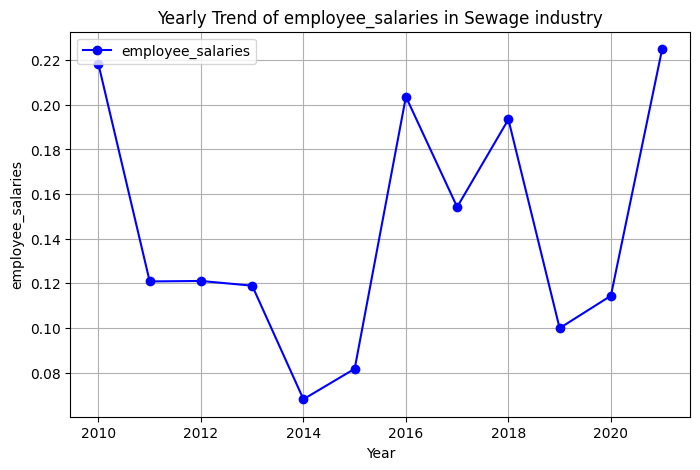

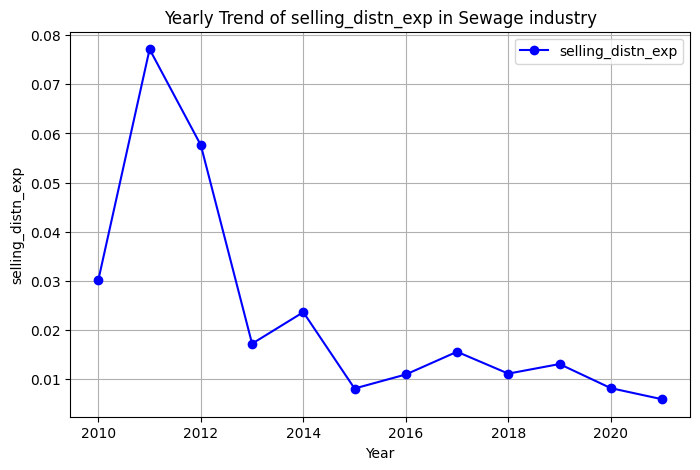

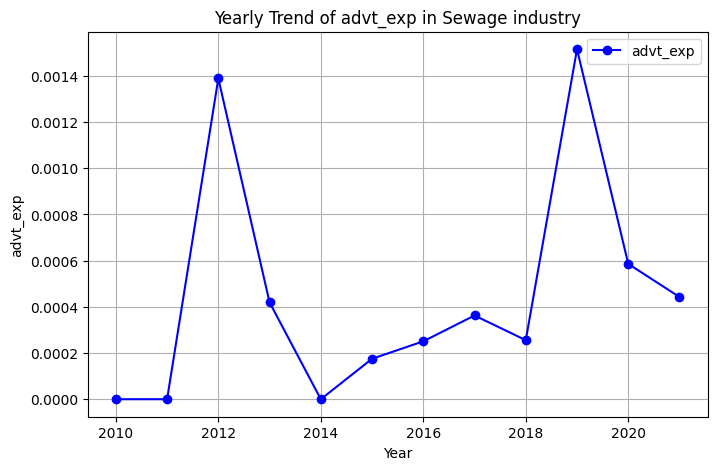

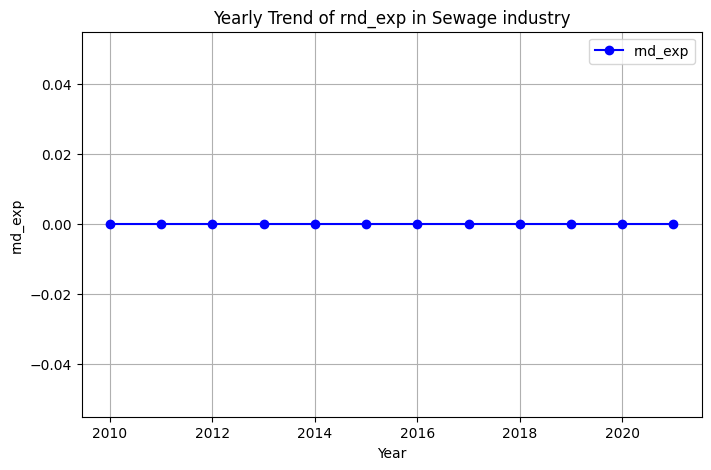

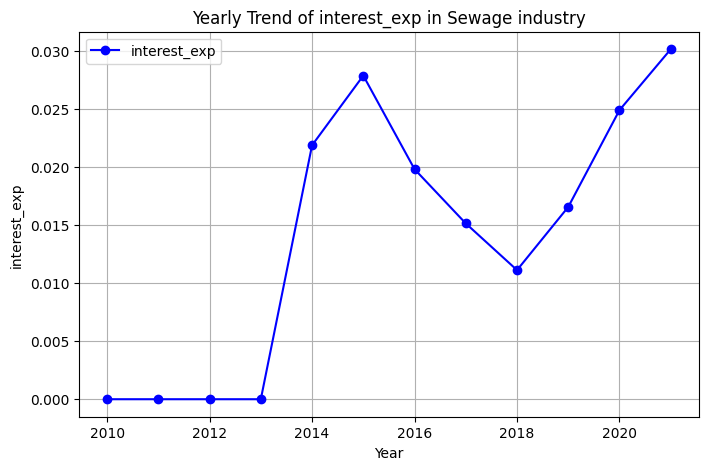

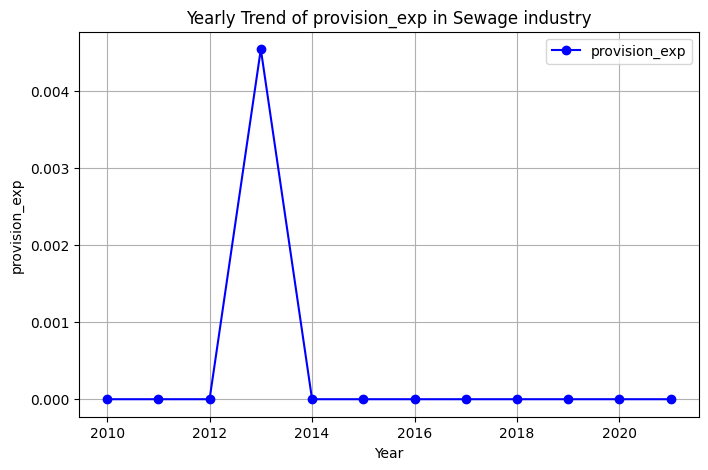

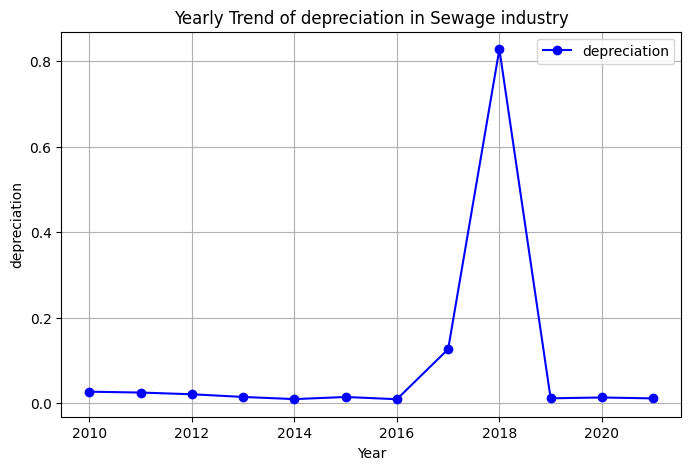

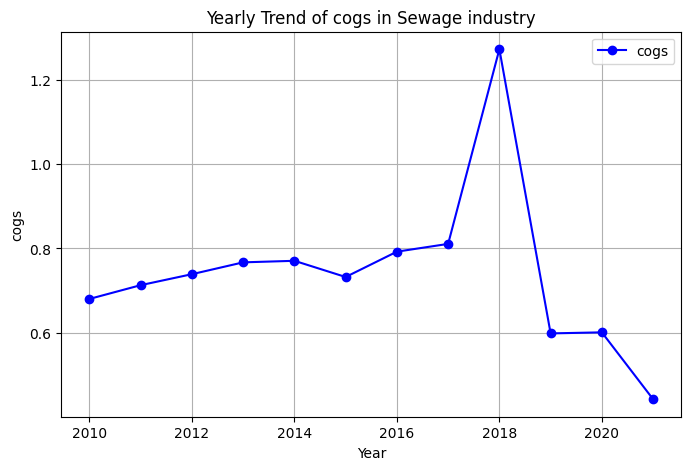

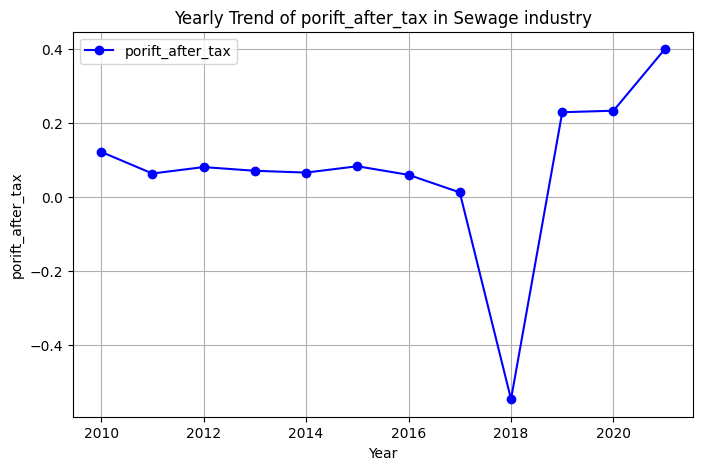

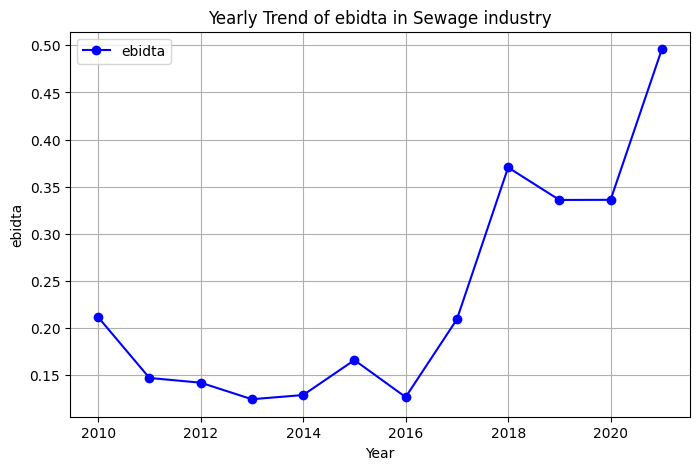

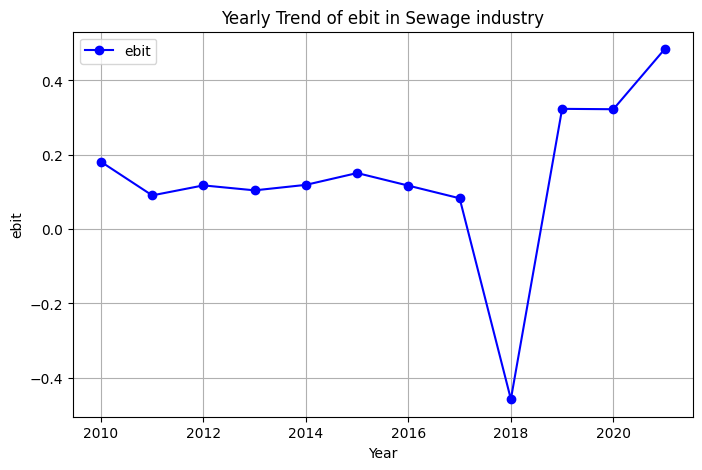

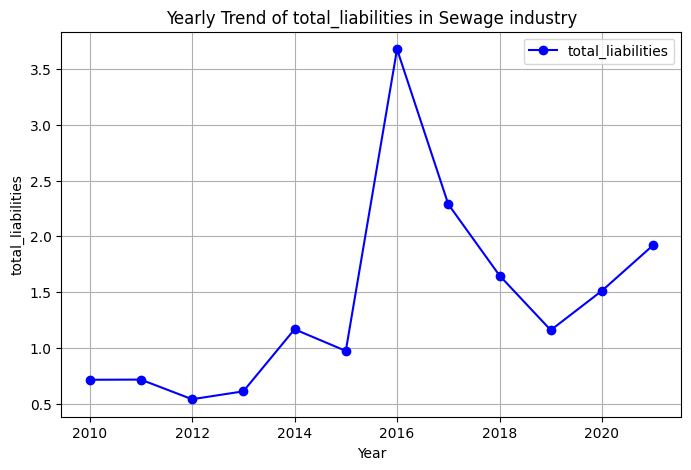

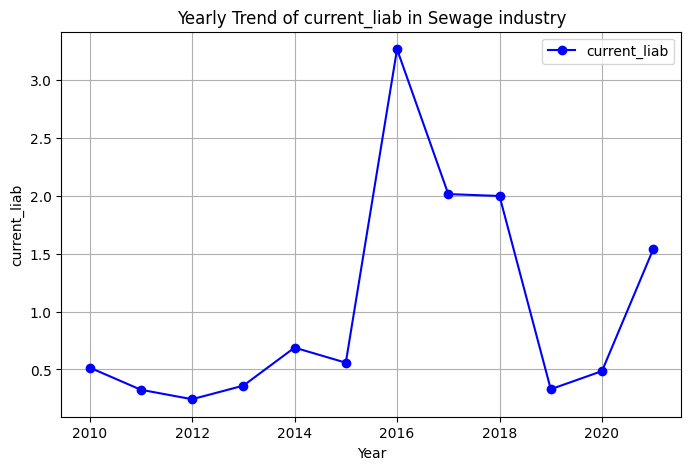

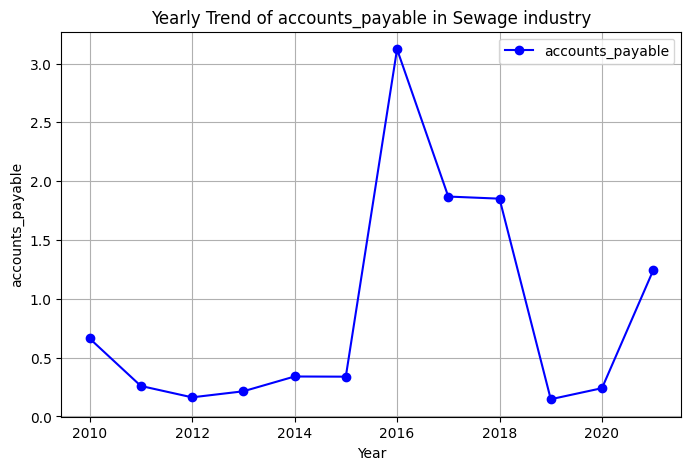

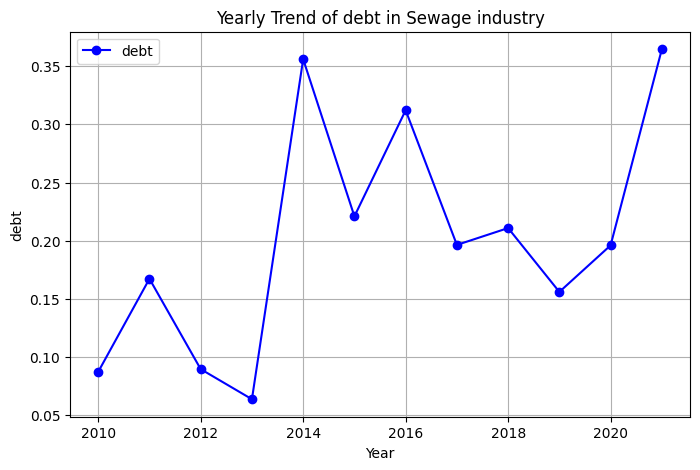

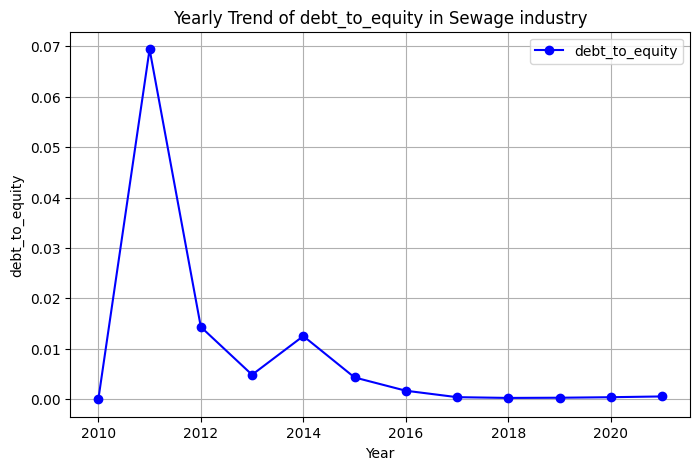

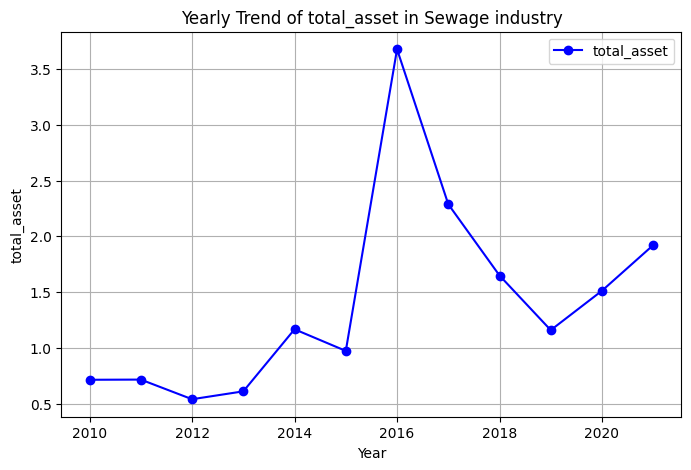

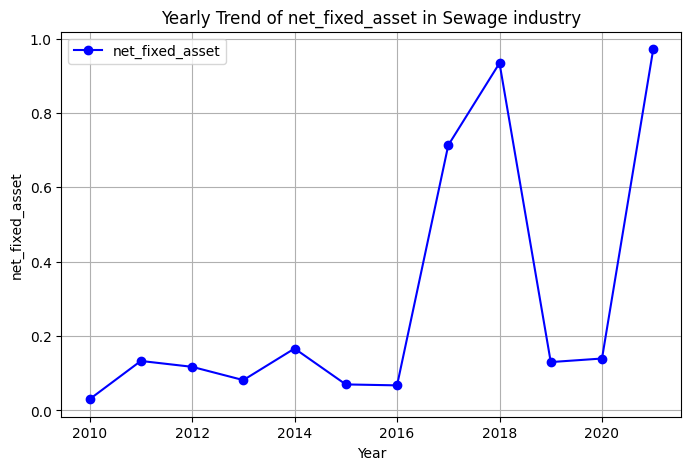

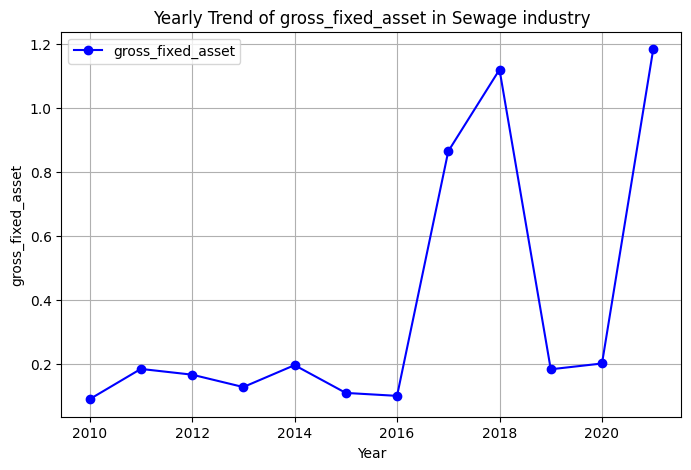

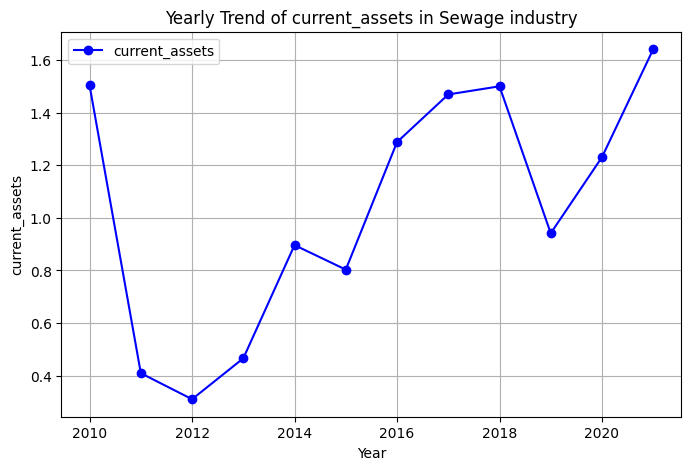

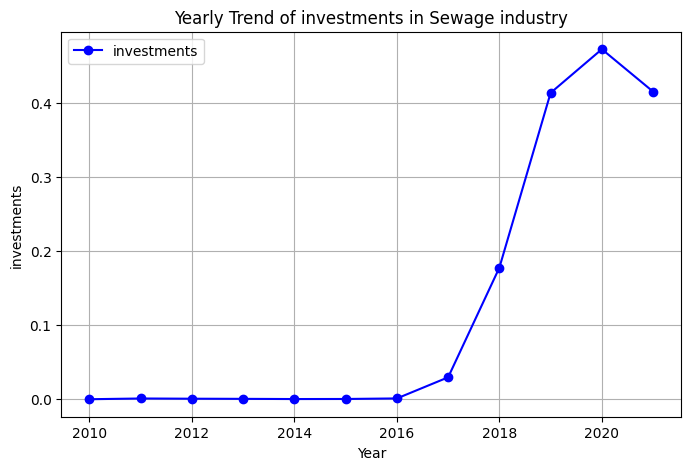

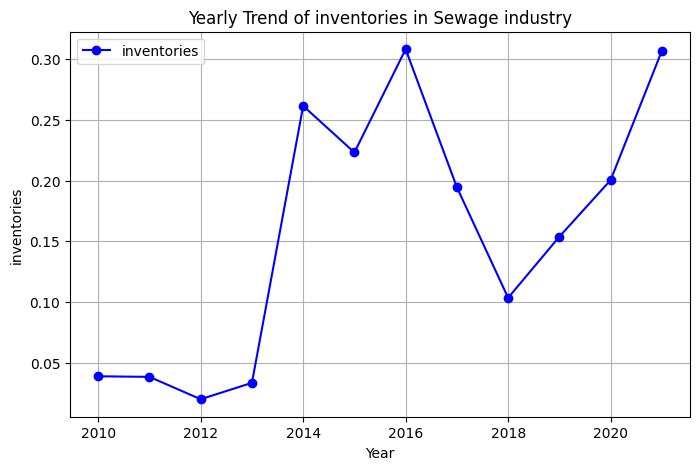

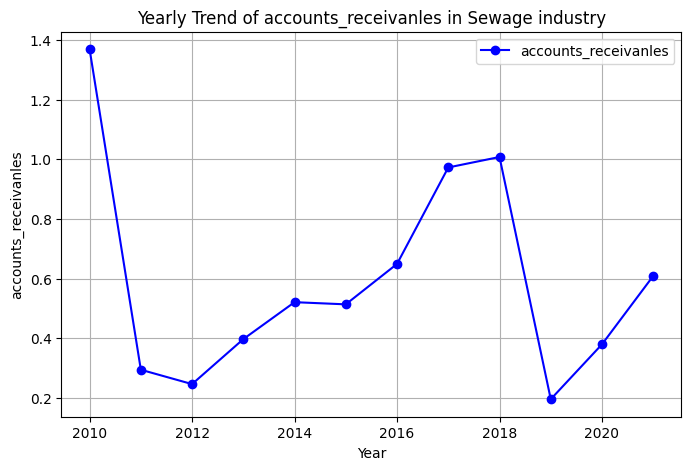

In [ ]:
sewage_industry=new_fin_data[new_fin_data['industry_id']==37]
sewage_industry.drop(['firmcode','month','day','date','industry_id'],axis=1,inplace=True)
columns=sewage_industry.columns
grouped_results_df = pd.DataFrame()
for column in columns:
  if column=='year' or column=='profit%' or column=='sales':
    continue
  sewage_industry[column]=sewage_industry[column]/sewage_industry['sales']
  sewage_industry[column]=sewage_industry[column].replace([np.inf, -np.inf], 0)
  grouped=sewage_industry.groupby(['year'])[column].mean()
  grouped_results_df[column] = grouped
grouped_results_df.reset_index(inplace=True)
plt.figure(figsize=(12, 8))
for column in grouped_results_df.columns:
    if column == 'year':
        continue
    plt.figure(figsize=(8, 5))
    plt.plot(grouped_results_df['year'], grouped_results_df[column], marker='o', label=column, color='b')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'Yearly Trend of {column} in Sewage industry')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
#creating standardised debt column where standardisation is done using sales
new_fin_data['standardised debt']=new_fin_data['debt']/new_fin_data['sales']*100
new_fin_data['standardised debt']=new_fin_data['standardised debt'].replace([np.inf, -np.inf], 0)

In [ ]:
ind_standarddebt=new_fin_data.groupby(['industry_id'])['standardised debt'].mean()
ind_standarddebt=ind_standarddebt.to_frame()
ind_standarddebt.reset_index(inplace=True)
ind_standarddebt['industry_id'] = ind_standarddebt['industry_id'].astype(str)
ind_standarddebt.sort_values(by='standardised debt',ascending=False,inplace=True)

In [ ]:
ind_standarddebt.head()

industry_id  standardised debt
35          42      244055.965567
50          61      141186.525499
53          64       97949.028180
62          74       66405.668378
29          34       48049.470507

In [ ]:
ind_standarddebt.tail()

industry_id  standardised debt
72          90          58.773218
1            2          58.325627
32          37          22.779054
8           12          20.693661
54          65           0.000000

In [ ]:
ind_debt_year=new_fin_data.groupby(['industry_id','year'])['standardised debt'].mean()
ind_debt_year=ind_debt_year.to_frame()
ind_debt_year.reset_index(inplace=True)

In [ ]:
industry_name[industry_name['industry_id']==42]

industry_id      Industry name
35           42  Civil engineering

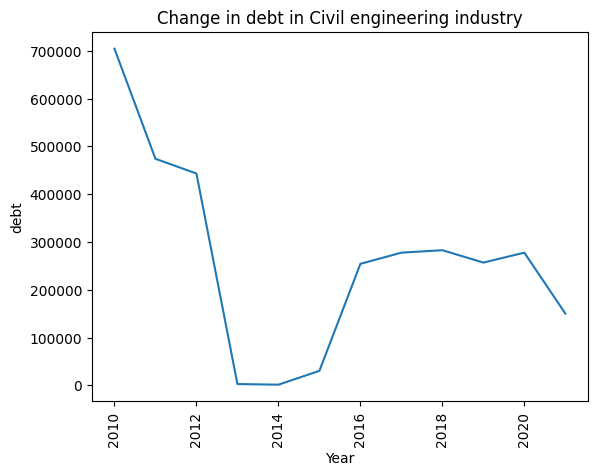

In [ ]:
top_debt_ind=ind_debt_year[ind_debt_year['industry_id']==42]
sns.lineplot(x='year', y='standardised debt',data=top_debt_ind)
plt.title('Change in debt in Civil engineering industry')
plt.xlabel('Year')
plt.ylabel('debt')
plt.xticks(rotation=90)
plt.show()

<ipython-input-37-786ea4722ecf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CE_industry.drop(['firmcode','month','day','date','industry_id'],axis=1,inplace=True)
<ipython-input-37-786ea4722ecf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CE_industry[column]=CE_industry[column]/CE_industry['sales']
<ipython-input-37-786ea4722ecf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

<Figure size 1200x800 with 0 Axes>

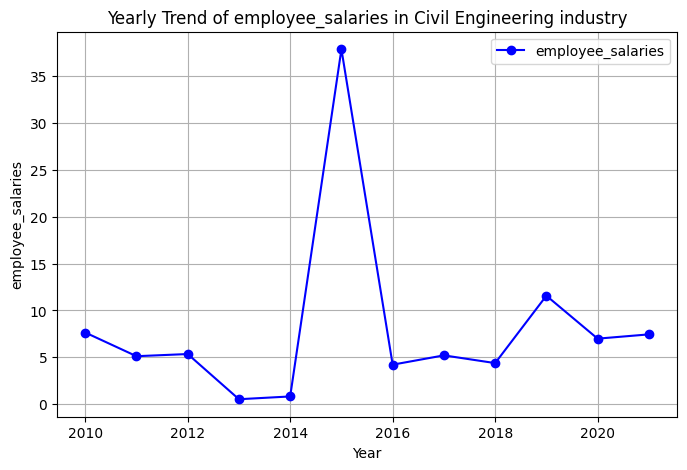

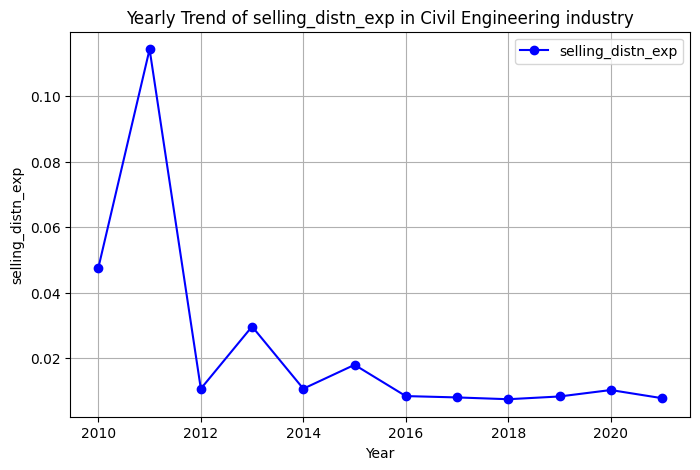

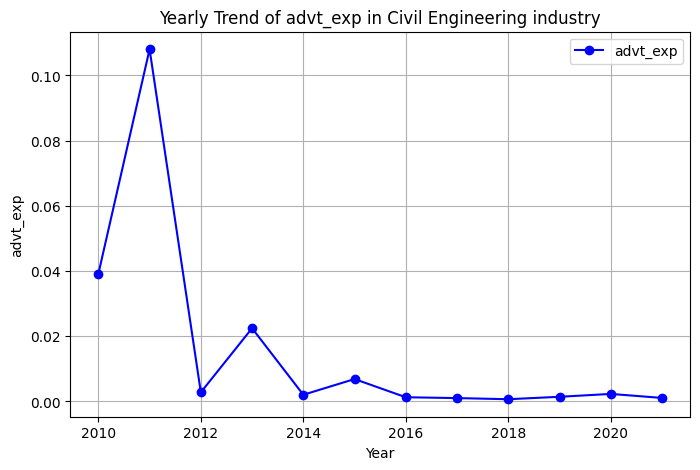

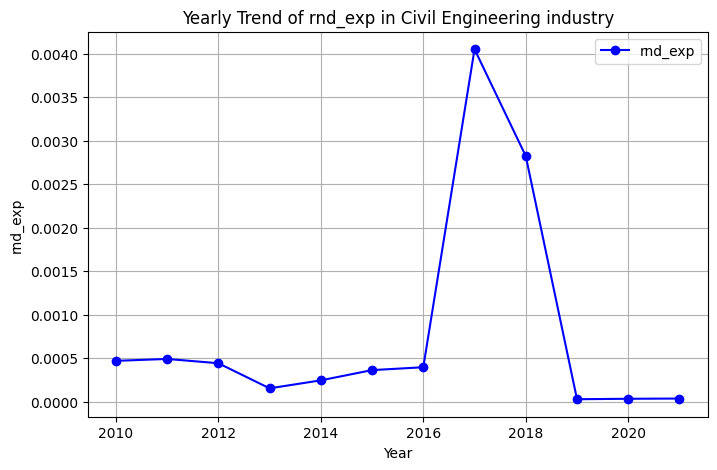

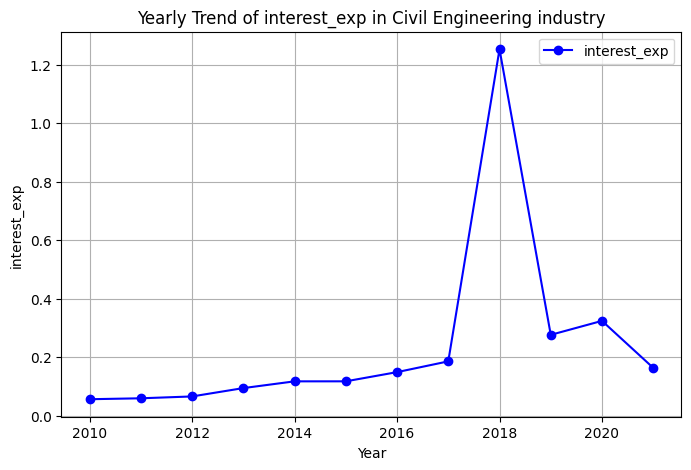

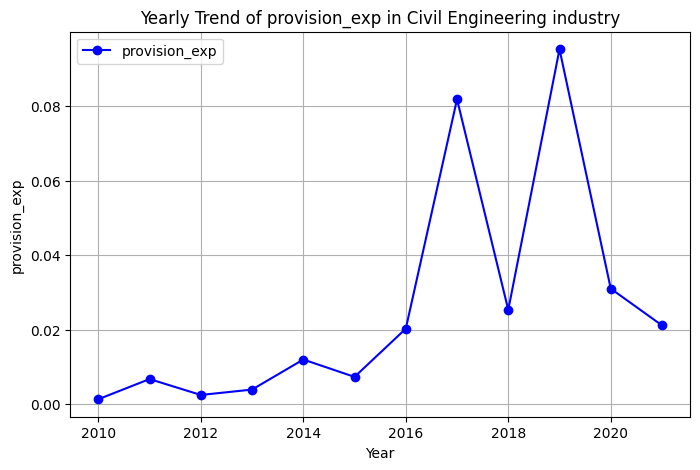

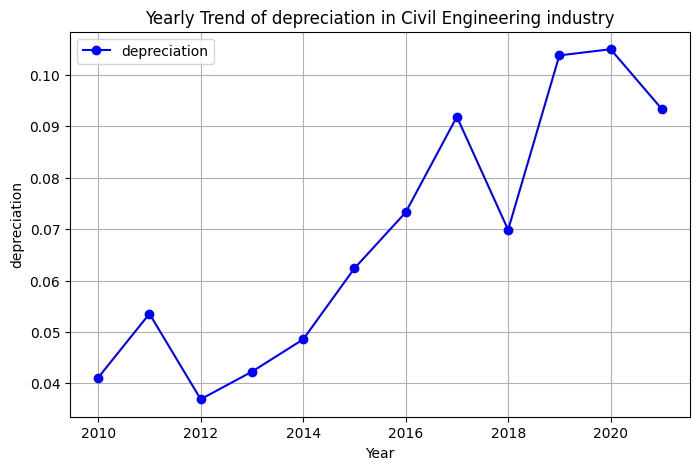

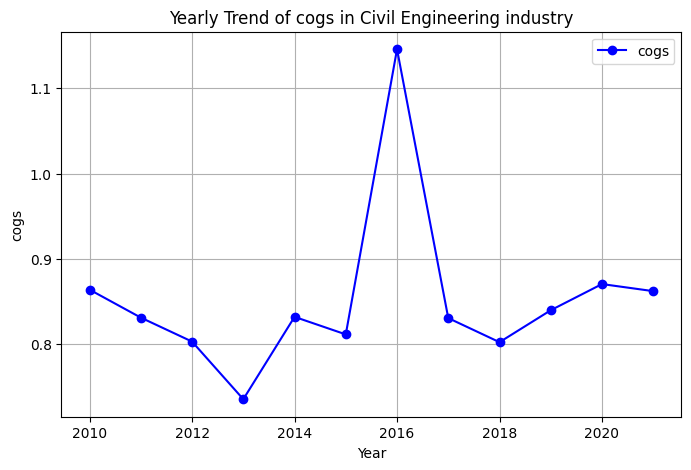

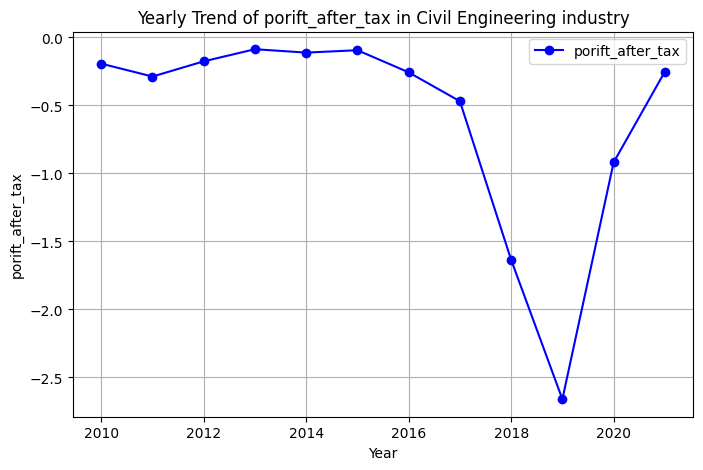

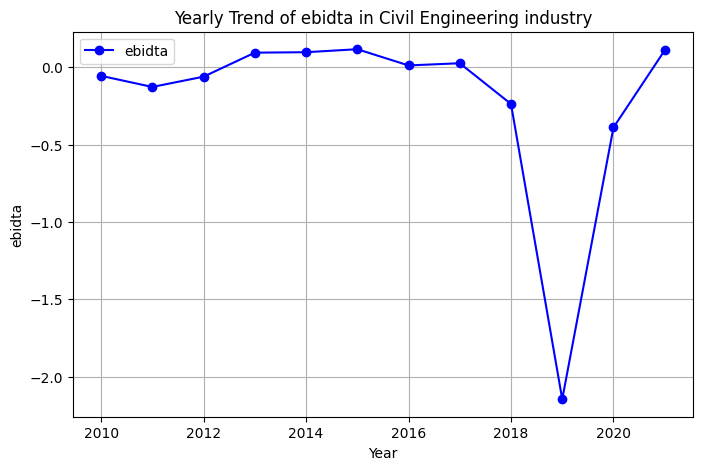

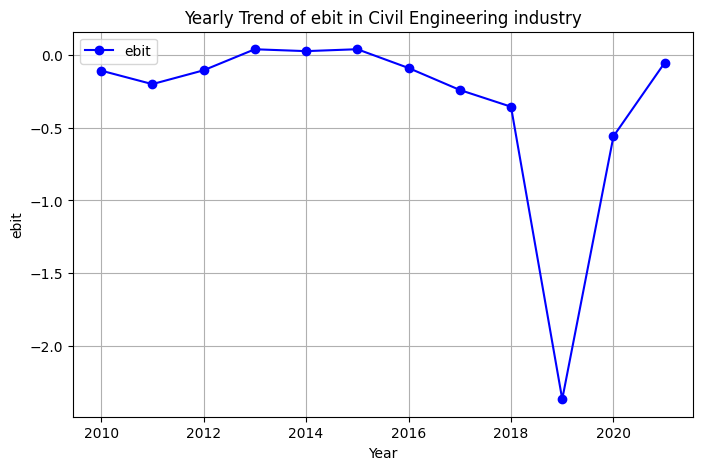

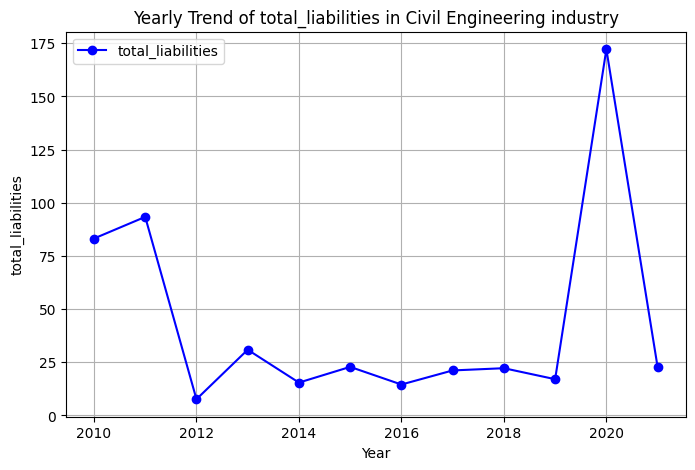

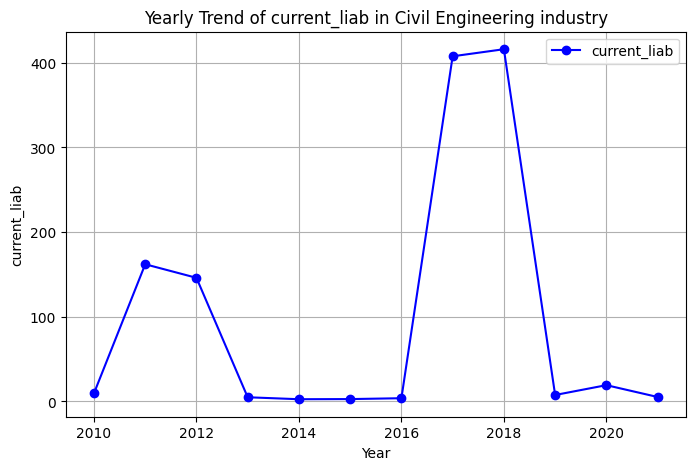

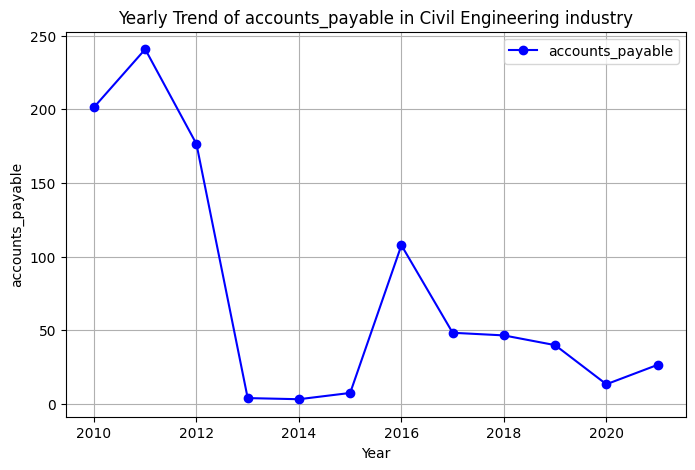

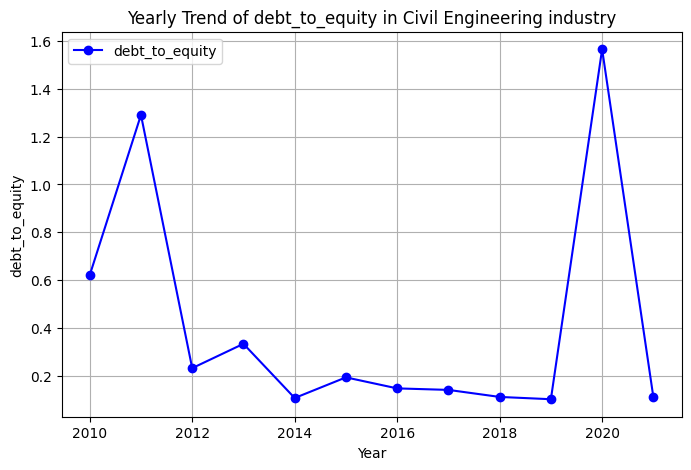

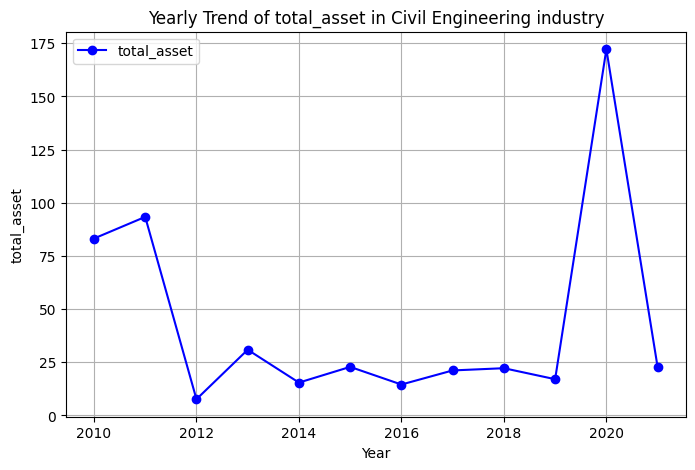

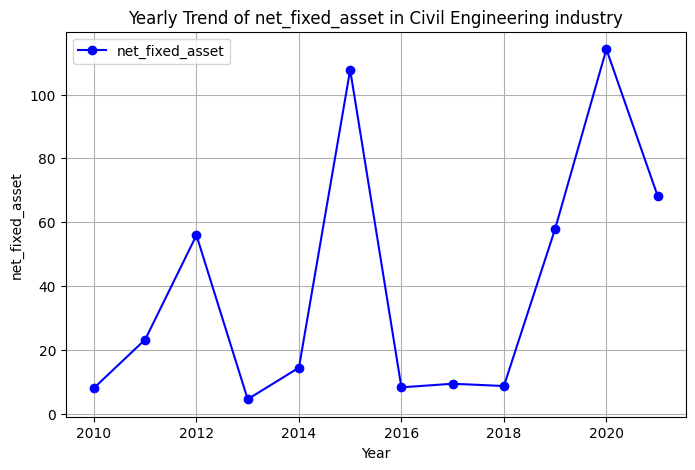

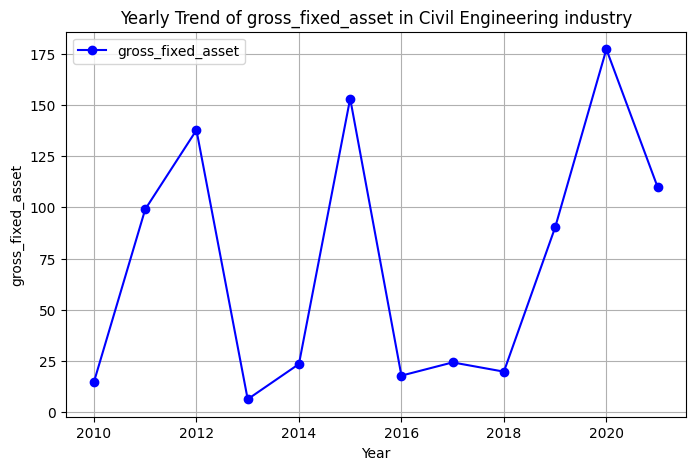

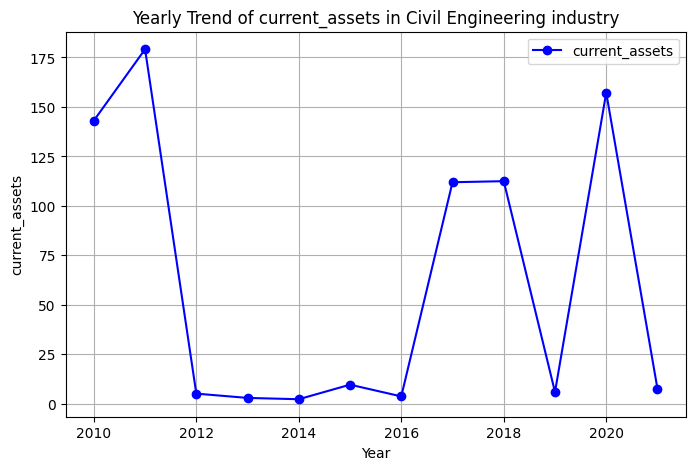

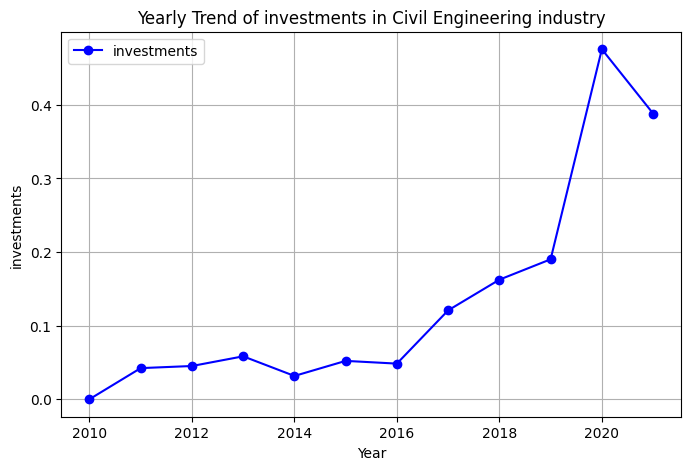

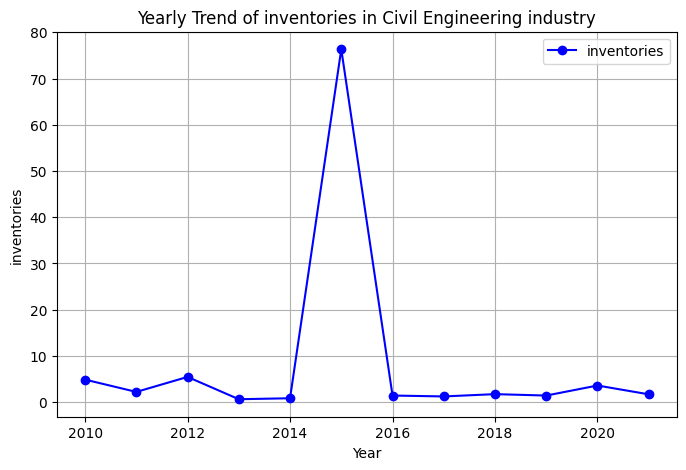

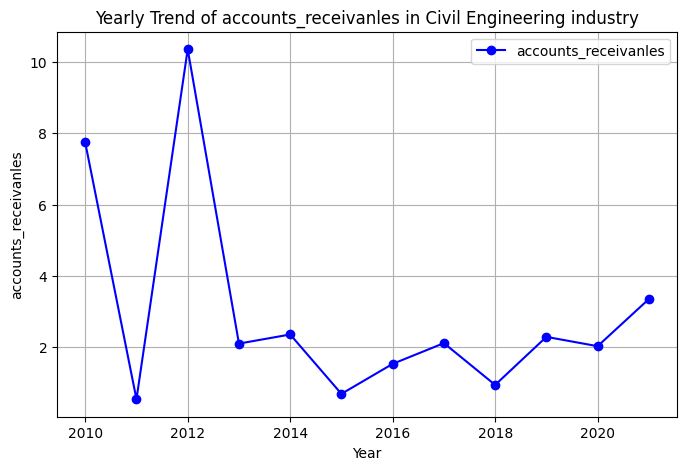

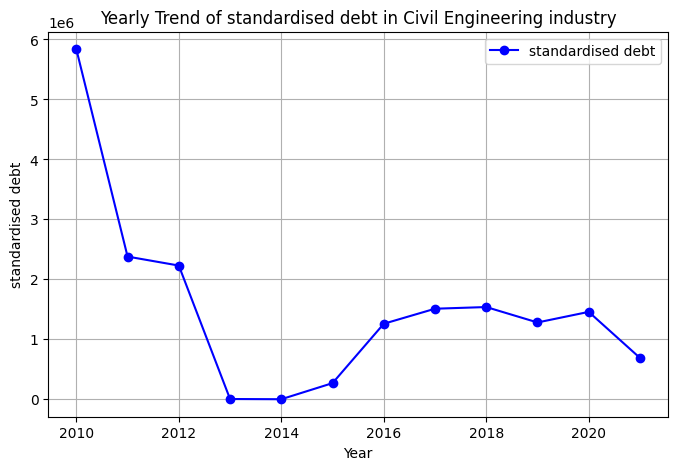

In [ ]:
CE_industry=new_fin_data[new_fin_data['industry_id']==42]
CE_industry.drop(['firmcode','month','day','date','industry_id'],axis=1,inplace=True)
columns=CE_industry.columns
grouped_results_df = pd.DataFrame()
for column in columns:
  if column=='year' or column=='profit%' or column=='sales' or column=='debt':
    continue
  CE_industry[column]=CE_industry[column]/CE_industry['sales']
  CE_industry[column]=CE_industry[column].replace([np.inf, -np.inf], 0)
  grouped=CE_industry.groupby(['year'])[column].mean()
  grouped_results_df[column] = grouped
grouped_results_df.reset_index(inplace=True)
plt.figure(figsize=(12, 8))
for column in grouped_results_df.columns:
    if column == 'year':
        continue
    plt.figure(figsize=(8, 5))
    plt.plot(grouped_results_df['year'], grouped_results_df[column], marker='o', label=column, color='b')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'Yearly Trend of {column} in Civil Engineering industry')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
new_fin_data=new_fin_data[new_fin_data['profit%']!=0]
pred_data=new_fin_data.drop(['firmcode','standardised debt','date','year','month'],axis=1)

In [ ]:
def build_regression_model(data, target, t_threshold=1.96):
    # Check if data is empty
    if data.empty:
        print("No data available for this industry.")
        return None

    # Separate predictors and target variable
    X = data.drop(target,axis=1)
    y = data[target]
    X=X.select_dtypes(include=['number'])
    # Add constant term for intercept
    X = sm.add_constant(X)
    X.columns = X.columns.astype(str)
    # Fit the initial OLS model
    ols_model = sm.OLS(y, X).fit()

    # Filter predictors based on t-score
    significant_predictors = ols_model.tvalues[ols_model.tvalues.abs() > t_threshold].index
    significant_X = X[significant_predictors]

    if significant_X.empty:
        print("No predictors passed the t-score threshold.")
        return None
    dummy=pd.get_dummies(data['industry_id'])
    significant_X=pd.concat([significant_X,dummy],axis=1)
    if 'industry_id' in significant_X.columns:
        significant_X = significant_X.drop('industry_id', axis=1)
    significant_X.columns = significant_X.columns.astype(str)
    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(significant_X, y, test_size=0.3, random_state=42)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    actual = np.array(y_test)
    predicted = np.array(y_pred)
    mae_percentage = np.mean(np.abs((actual - predicted) / actual)) * 100/len(actual)
    rscore = r2_score(y_test, y_pred)

    # Collect model details
    model_details = {
        "Intercept": model.intercept_,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAE%": mae_percentage,
        "R2": rscore,
    }

    for predictor, coeff in zip(significant_X.columns, model.coef_):
        model_details[predictor] = coeff

    return model_details


# Example usage with data
result_sales_lm = []
result_pat_lm = []

# Build model for sales
model_det = build_regression_model(pred_data,'sales')
if model_det is not None:
  result_sales_lm.append(model_det)

# Build model for profit%
model_det = build_regression_model(pred_data,'profit%')
if model_det is not None:
  result_pat_lm.append(model_det)

# Convert results to DataFrames
result_sales_lm_df = pd.DataFrame(result_sales_lm)
result_pat_lm_df = pd.DataFrame(result_pat_lm)


In [ ]:
new_fin_data.columns

Index(['firmcode', 'year', 'month', 'day', 'date', 'sales',
       'employee_salaries', 'selling_distn_exp', 'advt_exp', 'rnd_exp',
       'interest_exp', 'provision_exp', 'depreciation', 'cogs',
       'porift_after_tax', 'ebidta', 'ebit', 'total_liabilities',
       'current_liab', 'accounts_payable', 'debt', 'debt_to_equity',
       'total_asset', 'net_fixed_asset', 'gross_fixed_asset', 'current_assets',
       'investments', 'inventories', 'accounts_receivanles', 'industry_id',
       'profit%', 'standardised debt'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)
result_sales_lm_df.head()

Intercept           MSE          RMSE          MAE      MAE%        R2  \
0  445.673402  7.789503e+08  27909.681843  4084.514681  0.199588  0.774364   

   selling_distn_exp   advt_exp   rnd_exp    ebidta           1           2  \
0          18.021292 -21.390841  0.185629  2.508429  216.888985  326.851122   

              5             6             7            8          10  \
0  13360.687713 -82386.373584 -10042.391317 -1153.715482  981.057662   

            11           12          13          14          15         16  \
0 -1038.359367 -3880.085823  284.571491 -579.421026 -575.365669 -582.60522   

           17          18            19           20           21          22  \
0 -661.567593  226.830358  69942.499369 -1097.070331 -2591.725247 -252.246768   

             23          24          25           26          27          28  \
0 -14592.402741  241.497781  242.512332  1497.578727 -184.369436  225.860387   

            29           30          31           32           34  \
0  2330.129193  3915.997826 -589.124468  4969.594521 -1172.366812   

            35          36          37          38          41           42  \
0  6373.826061 -427.690438 -372.632726 -511.970552 -351.330505  2499.750329   

            43           45          46           47           49          50  \
0  1148.681142  2545.952247  976.429008  2864.812617  1158.489305 -221.764227   

            51           52          53          55          56           58  \
0  4060.528727  1060.662104  860.618257 -365.124848 -236.679407 -1000.849088   

          59           60           61          62           63          64  \
0 -84.702832 -2299.046188 -2846.721581  742.491896  1103.276227  154.023588   

           65          66          68          69          70         71  \
0 -494.992269 -488.053361 -109.001132 -267.114376  524.059014  455.82653   

           72          73         74         75         77           78  \
0 -222.100889  456.615807 -376.40005 -438.56512 -332.93519  1429.915555   

           79          80          82          84          85          86  \
0  604.987377  1172.38207 -114.360824 -602.406798 -140.924933  133.467109   

            90           93           94          95           96  
0  3490.260509  1021.248949 -1114.825852 -170.093244  1368.615416

In [ ]:
result_pat_lm_df.head()

Intercept           MSE          RMSE         MAE      MAE%        R2  \
0 -165.776911  5.888481e+08  24266.192062  944.539739  0.654409  0.002509   

    rnd_exp  interest_exp    ebidta          1          2            5  \
0 -0.026301     -0.806282  0.089314  160.23382  161.79971 -1039.005996   

             6          7          8          10        11          12  \
0 -3499.926031 -12.457736  21.050093  165.924772  89.49482 -449.618158   

           13          14          15          16         17          18  \
0  191.871604  146.831377  145.387412  182.166891  95.392957  139.594344   

           19          20        21        22          23          24  \
0  789.023482  152.693855  103.2455  80.23093  114.272102  316.848976   

           25          26          27         28          29         30  \
0  128.235932  178.267021  133.656656  174.74846  200.563526  71.734433   

           31          32          34           35          36          37  \
0  163.187151  165.019959 -405.516398  1448.231979  170.984591  169.470532   

           38          41          42          43          45         46  \
0  156.636753  115.462391  371.083796  317.997559  143.451105 -11.943607   

           47          49          50           51         52          53  \
0  201.911947  211.861356  194.765658  1457.435164  149.38074  127.626277   

           55         56          58         59         60          61  \
0  158.794839  81.207688  158.479874  79.678287  85.922343  854.992371   

          62          63          64          65          66         68  \
0 -40.119363  107.895419 -4957.44502  179.884407 -252.551442 -85.842222   

           69          70          71          72         73          74  \
0  124.327786 -453.234477  132.436852 -248.043712  79.136613 -802.170761   

          75          77         78          79          80         82  \
0  140.75356 -609.009326  50.217738  149.200157  176.221734  85.851965   

           84          85          86          90          93         94  \
0  185.103097  111.226291  147.764752  149.227868 -254.825887  93.062977   

           95          96  
0  115.577319  166.970565

In [ ]:
def build_Dtree(data, target, t_threshold=2):
    if data.empty:
        print("No data available for this industry.")
        return None

    # Separate predictors and target variable
    X = data.drop(target,axis=1)
    y = data[target]
    X=X.select_dtypes(include=['number'])
    # Add constant term for intercept
    X = sm.add_constant(X)
    X.columns = X.columns.astype(str)
    # Fit the initial OLS model
    ols_model = sm.OLS(y, X).fit()

    # Filter predictors based on t-score
    significant_predictors = ols_model.tvalues[ols_model.tvalues.abs() > t_threshold].index
    significant_X = X[significant_predictors]

    if significant_X.empty:
        print("No predictors passed the t-score threshold.")
        return None
    if target=='profit%':
        significant_X=data.drop(target,axis=1)
    dummy=pd.get_dummies(data['industry_id'])
    significant_X=pd.concat([significant_X,dummy],axis=1)
    significant_X.columns = significant_X.columns.astype(str)
    if 'industry_id' in significant_X.columns:
        significant_X = significant_X.drop('industry_id', axis=1)
    print(significant_X.columns)
    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(significant_X, y, test_size=0.3, random_state=42)

    # Build Decision tree

    model = DecisionTreeRegressor(random_state=42)


    # Train the model
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test).flatten()
    #print(model.feature_importances_)
    #tree_text = export_text(model, feature_names=list(X_train.columns)
    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    rscore=r2_score(y_test, y_pred)
    actual = np.array(y_test)
    predicted = np.array(y_pred)
    mae_percentage = np.mean(np.abs((actual - predicted) / actual)) * 100/len(actual)
    # Collect model details
    model_details = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAE%": mae_percentage,
        "R2":rscore
    }



    return model_details
result_sales_dt = []
result_pat_dt = []
print(pred_data.columns)
model_det=build_Dtree(pred_data,'sales')
if model_det is not None:
    result_sales_dt.append(model_det)
model_det=build_Dtree(pred_data,'profit%')

# Build model for profit%
if model_det is not None:
    result_pat_dt.append(model_det)

result_sales_dt_df = pd.DataFrame(result_sales_dt)
result_pat_dt_df = pd.DataFrame(result_pat_dt)

Index(['day', 'sales', 'selling_distn_exp', 'advt_exp', 'rnd_exp',
       'interest_exp', 'ebidta', 'total_liabilities', 'debt_to_equity',
       'total_asset', 'industry_id', 'profit%'],
      dtype='object')
Index(['selling_distn_exp', 'advt_exp', 'rnd_exp', 'ebidta', '1', '2', '5',
       '6', '7', '8', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '34', '35', '36', '37', '38', '41', '42', '43', '45', '46',
       '47', '49', '50', '51', '52', '53', '55', '56', '58', '59', '60', '61',
       '62', '63', '64', '65', '66', '68', '69', '70', '71', '72', '73', '74',
       '75', '77', '78', '79', '80', '82', '84', '85', '86', '90', '93', '94',
       '95', '96'],
      dtype='object')
Index(['day', 'sales', 'selling_distn_exp', 'advt_exp', 'rnd_exp',
       'interest_exp', 'ebidta', 'total_liabilities', 'debt_to_equity',
       'total_asset', '1', '2', '5', '6', '7', '8', '10', '11'

In [ ]:
result_sales_dt_df.head()

MSE          RMSE          MAE      MAE%       R2
0  3.285169e+08  18125.034488  2641.941418  0.015093  0.90484

In [ ]:
result_pat_dt_df.head()

MSE          RMSE         MAE     MAE%        R2
0  1.954197e+08  13979.260114  246.571577  0.00365  0.668965

Linear Regression Equation:
Y = -59.22 + -0.10*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


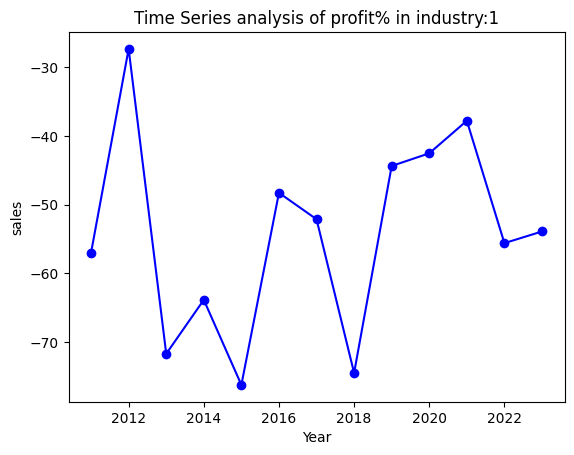

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Linear Regression Equation:
Y = -1.46 + 0.18*Prev_profit%


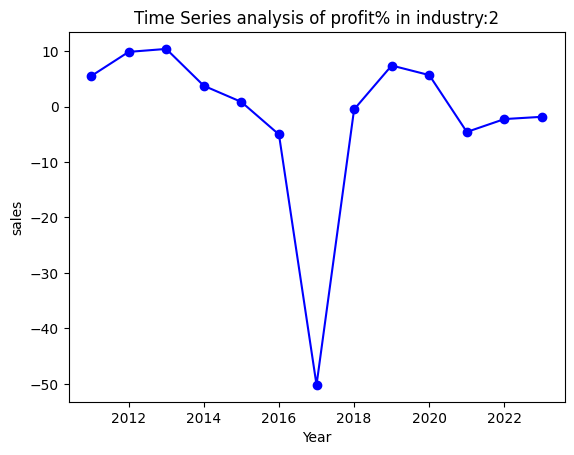

Linear Regression Equation:
Y = -17.22 + -0.09*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


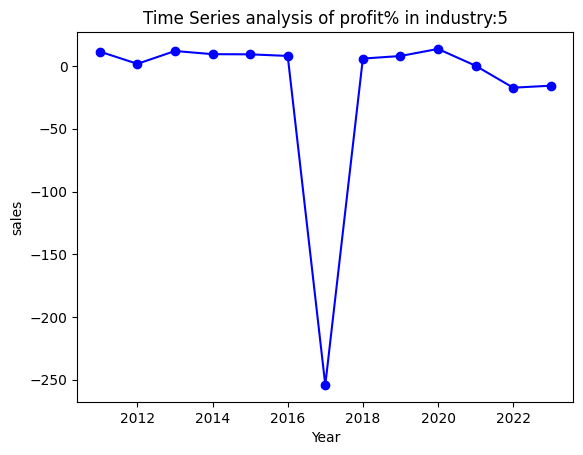

Linear Regression Equation:
Y = -101.29 + 0.07*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


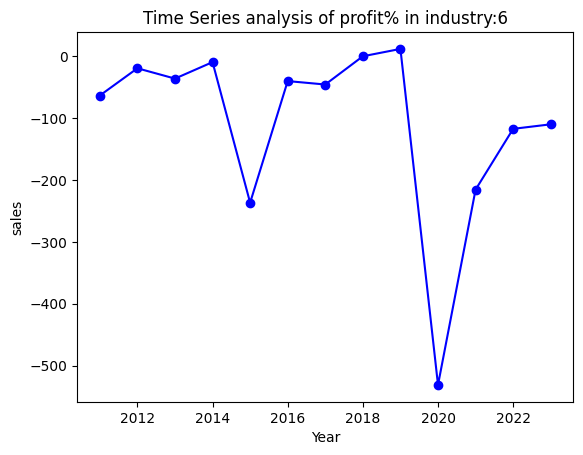

Linear Regression Equation:
Y = -117.27 + -0.18*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


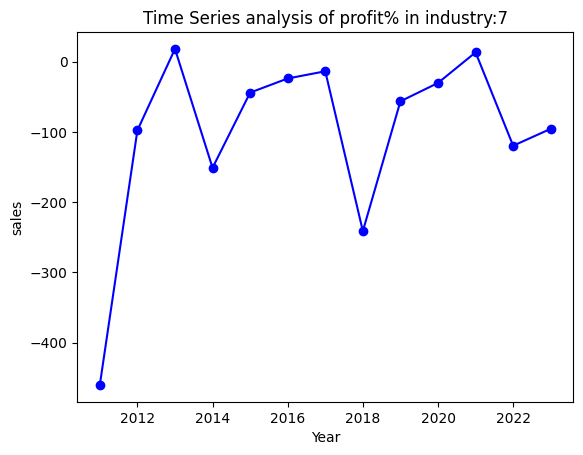

Linear Regression Equation:
Y = -91.60 + -0.10*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


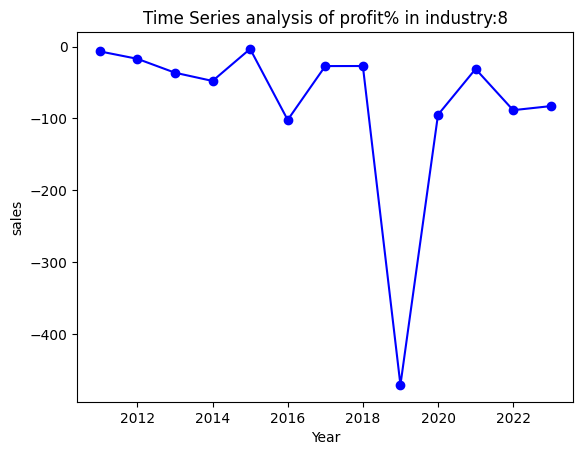

Linear Regression Equation:
Y = -57.75 + -0.09*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


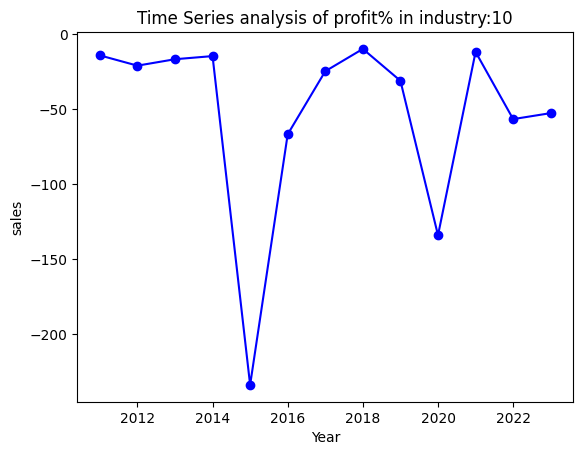

Linear Regression Equation:
Y = -107.69 + -0.18*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


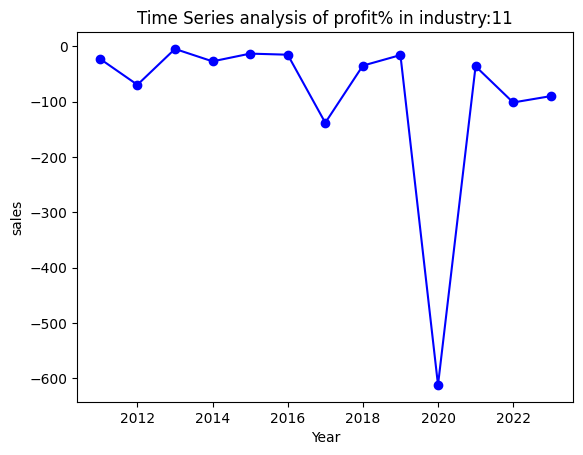

Linear Regression Equation:
Y = -1.42 + -0.14*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


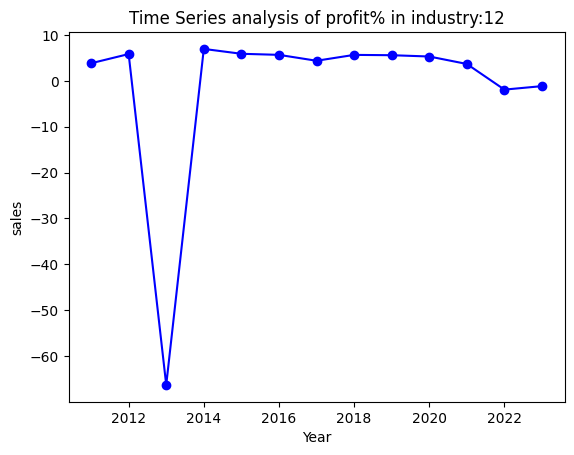

Linear Regression Equation:
Y = -126.53 + 0.05*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


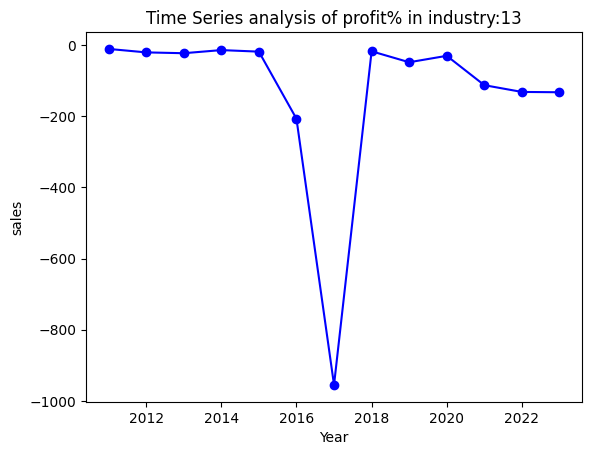

Linear Regression Equation:
Y = -43.18 + 0.24*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


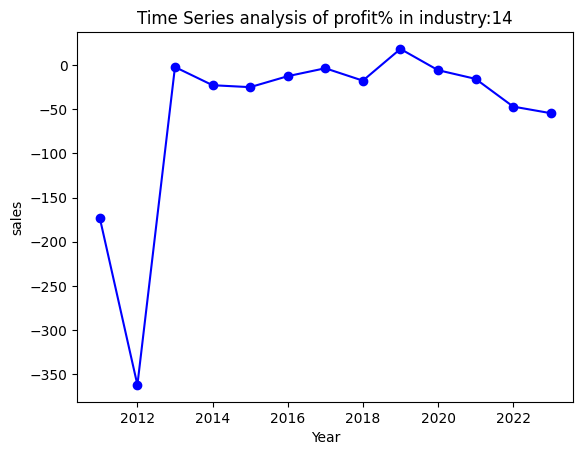

Linear Regression Equation:
Y = -22.60 + -0.13*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


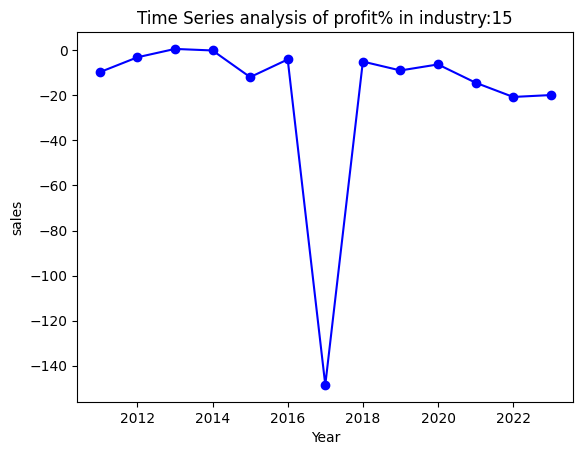

Linear Regression Equation:
Y = -6.20 + -0.06*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


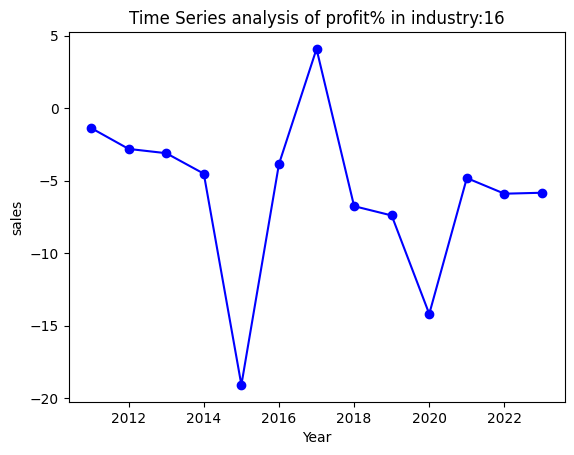

Linear Regression Equation:
Y = -116.20 + 0.40*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


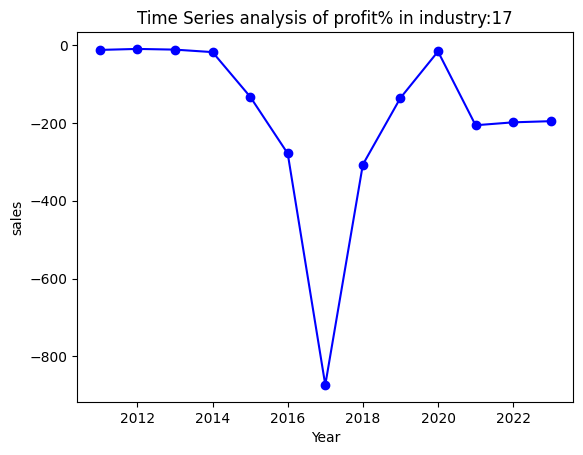

Linear Regression Equation:
Y = -16.92 + 0.26*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


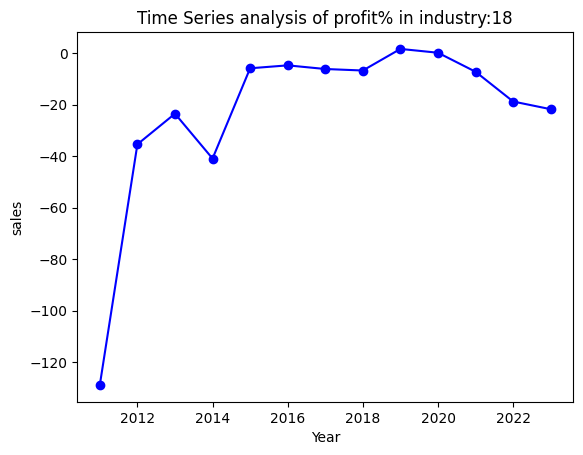

Linear Regression Equation:
Y = -241.89 + -0.13*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


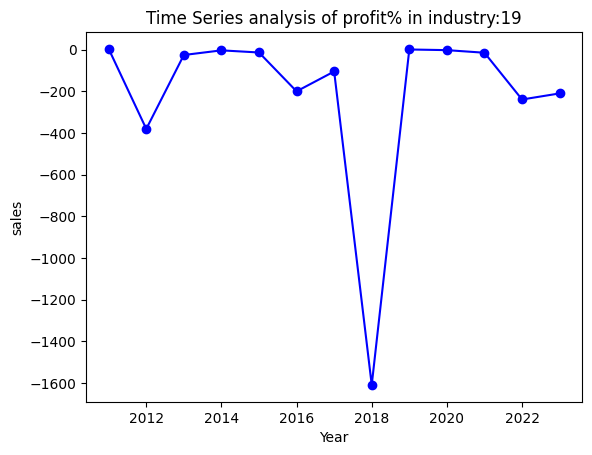

Linear Regression Equation:
Y = -43.96 + 0.31*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


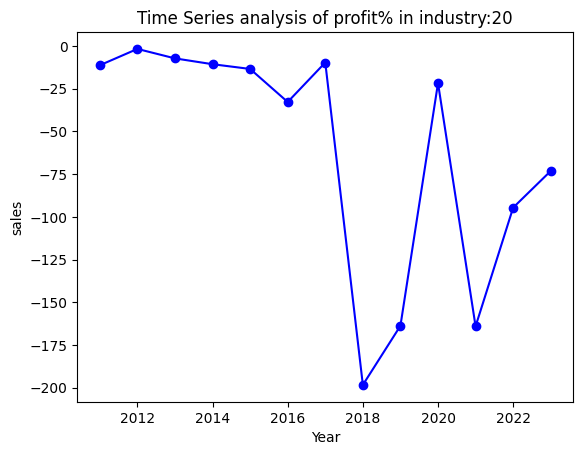

Linear Regression Equation:
Y = -121.06 + -0.94*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


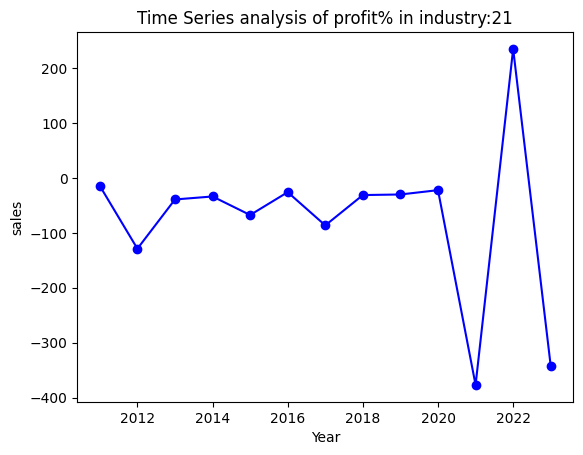

Linear Regression Equation:
Y = -15.06 + 0.49*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


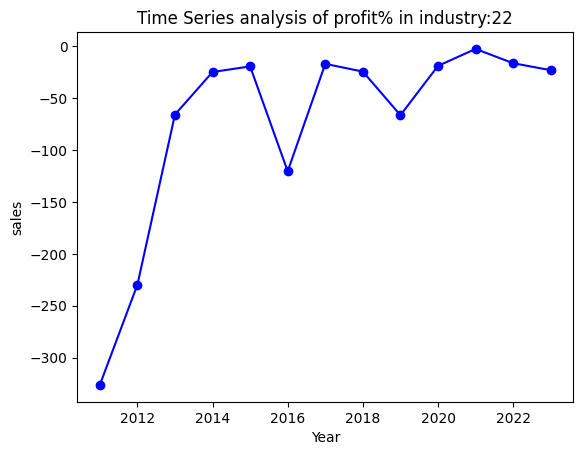

Linear Regression Equation:
Y = -131.16 + -0.09*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


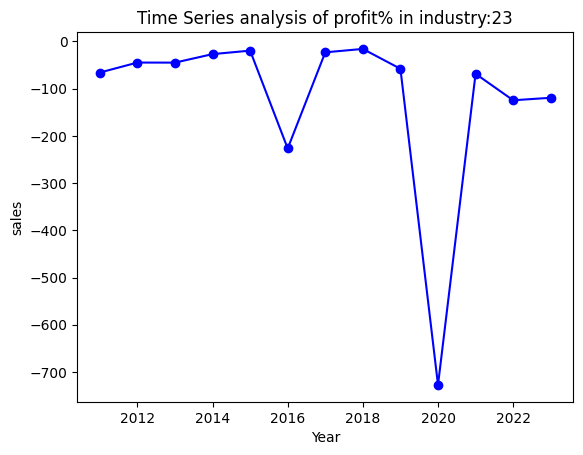

Linear Regression Equation:
Y = -48.86 + 0.45*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


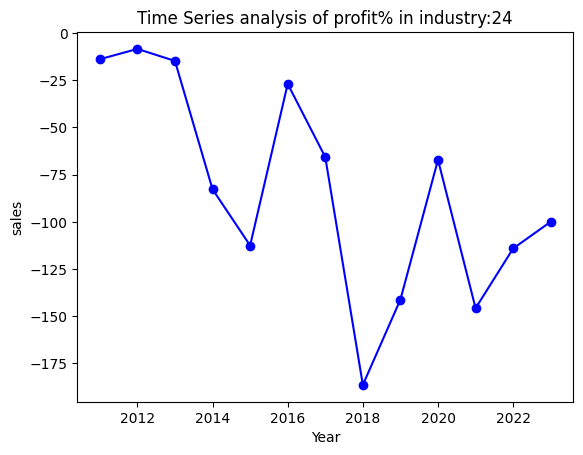

Linear Regression Equation:
Y = -87.73 + -0.18*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


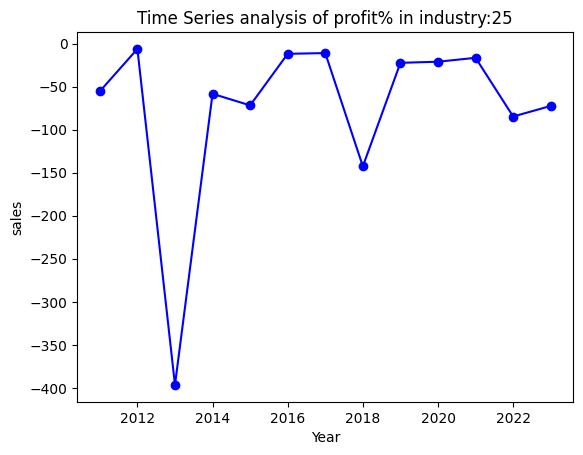

Linear Regression Equation:
Y = -36.63 + 0.52*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


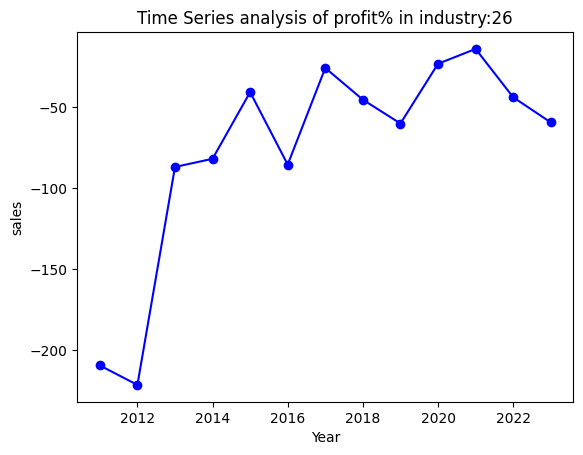

Linear Regression Equation:
Y = -79.49 + -0.27*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


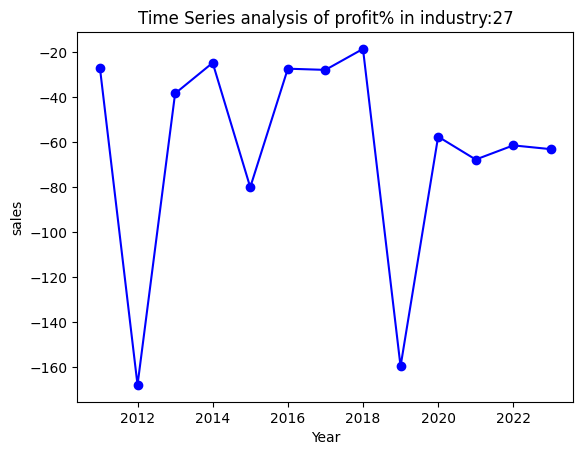

Linear Regression Equation:
Y = -20.19 + -0.18*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


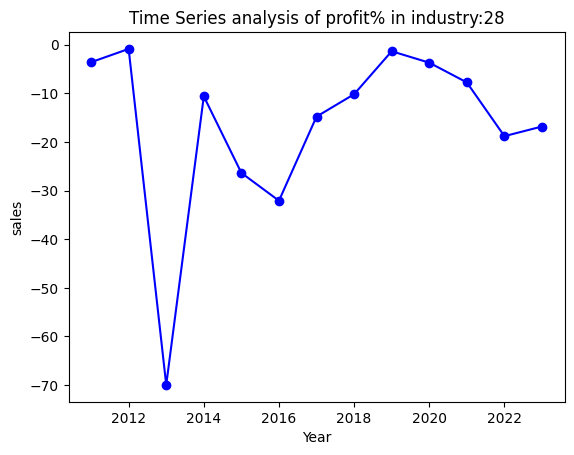

Linear Regression Equation:
Y = -43.88 + -0.63*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


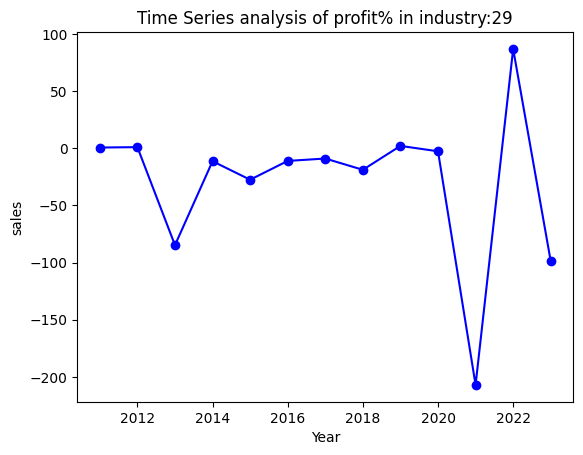

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Linear Regression Equation:
Y = -92.18 + 0.09*Prev_profit%


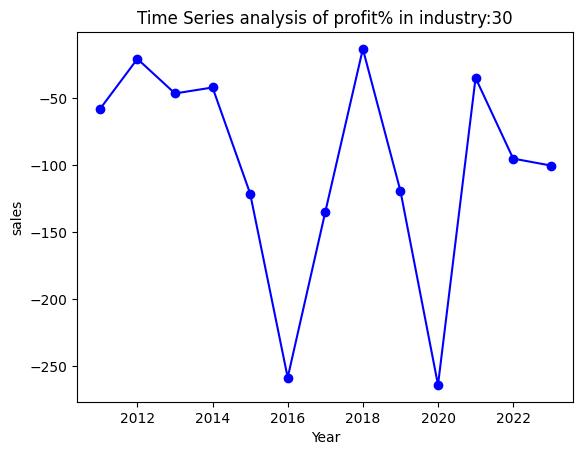

Linear Regression Equation:
Y = -16.55 + -0.07*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


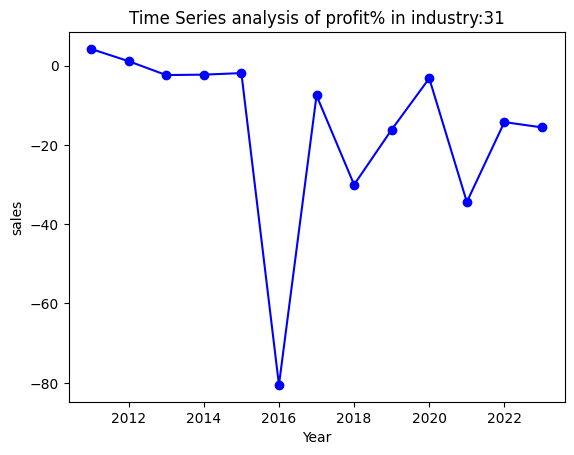

Linear Regression Equation:
Y = -114.53 + 0.07*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


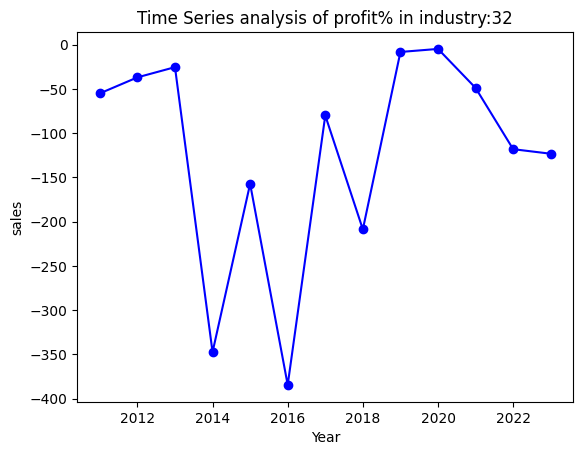

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Linear Regression Equation:
Y = -708.71 + -0.13*Prev_profit%


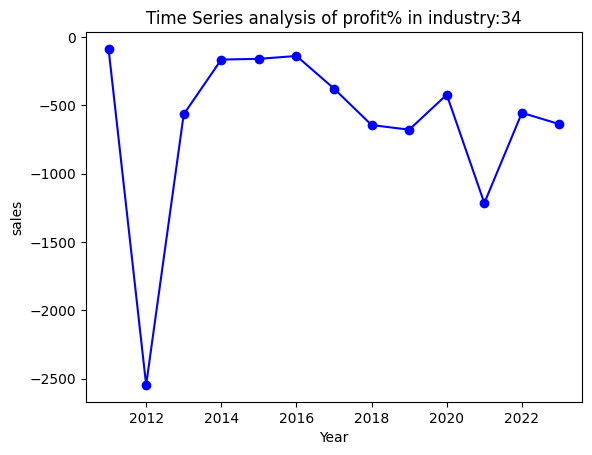

Linear Regression Equation:
Y = -699.35 + 0.74*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


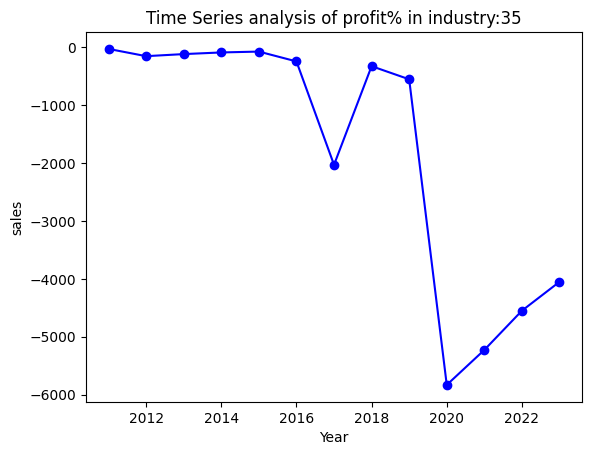

Linear Regression Equation:
Y = -54.33 + 0.05*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


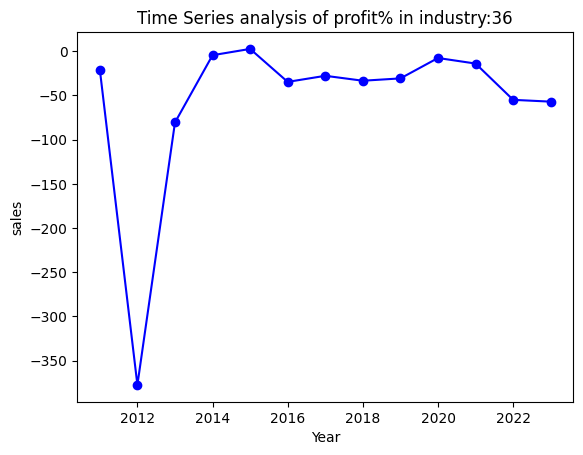

Linear Regression Equation:
Y = 6.54 + 0.04*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


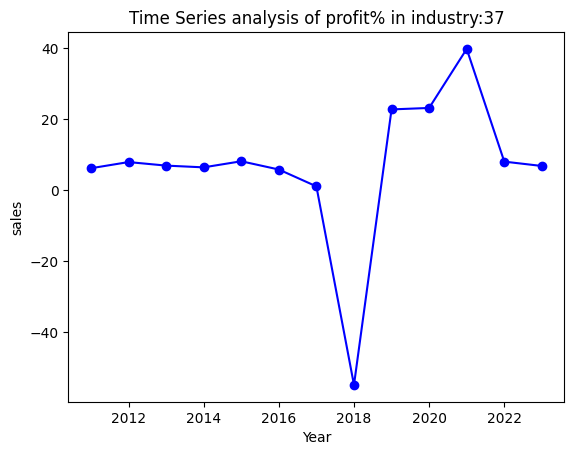

Linear Regression Equation:
Y = -15.78 + -0.03*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


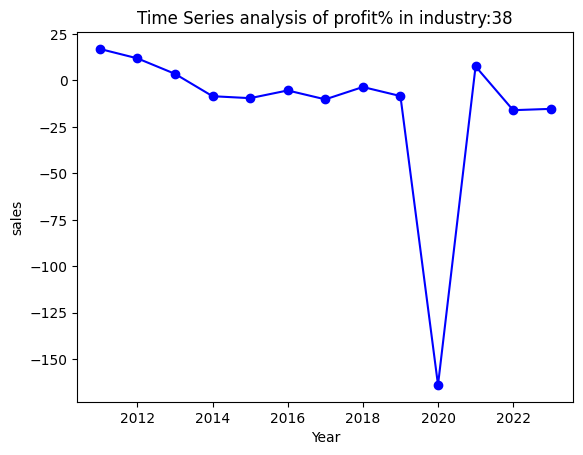

Linear Regression Equation:
Y = -308.53 + -0.31*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


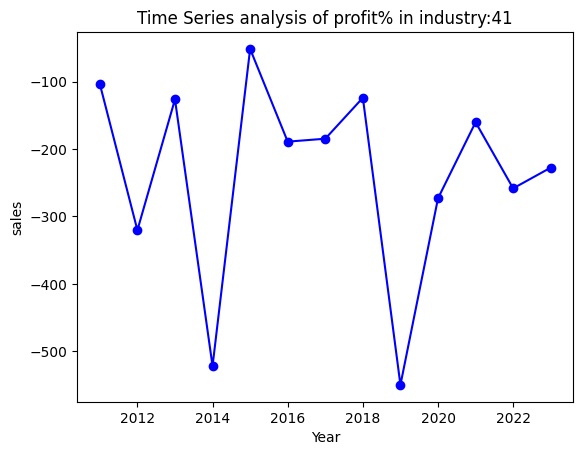

Linear Regression Equation:
Y = -29.16 + 0.55*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


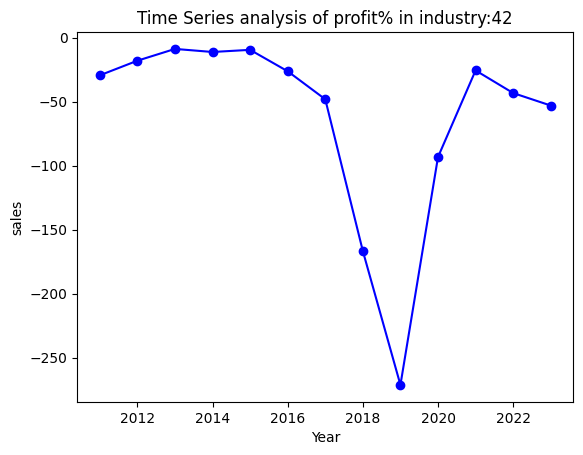

Linear Regression Equation:
Y = -19.90 + -0.04*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


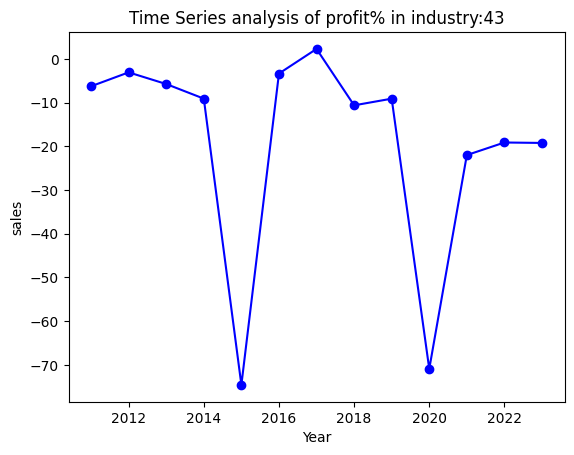

Linear Regression Equation:
Y = -37.63 + 0.21*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


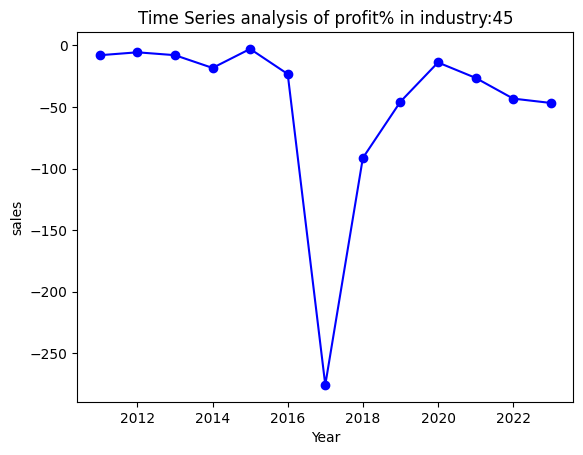

Linear Regression Equation:
Y = -258.20 + 0.32*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


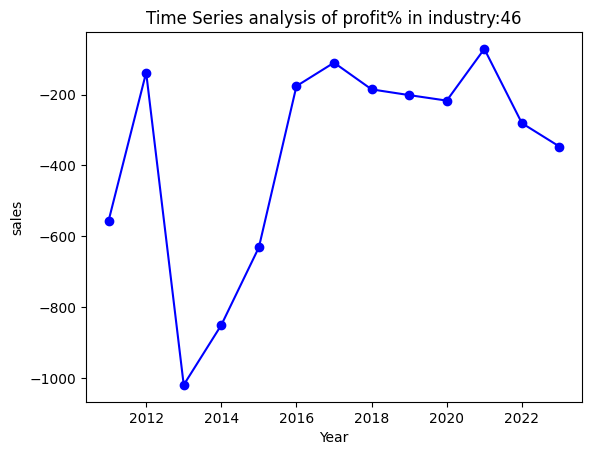

Linear Regression Equation:
Y = -67.07 + 0.12*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


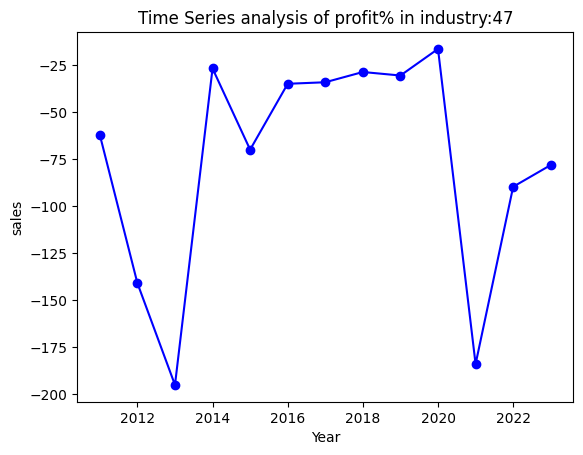

Linear Regression Equation:
Y = -49.24 + 0.08*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


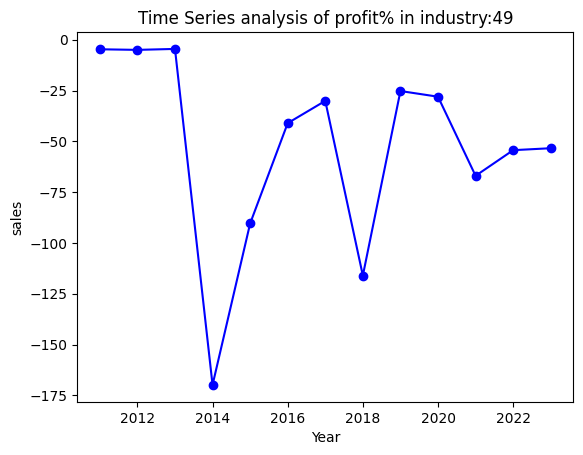

Linear Regression Equation:
Y = -72.42 + 0.23*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


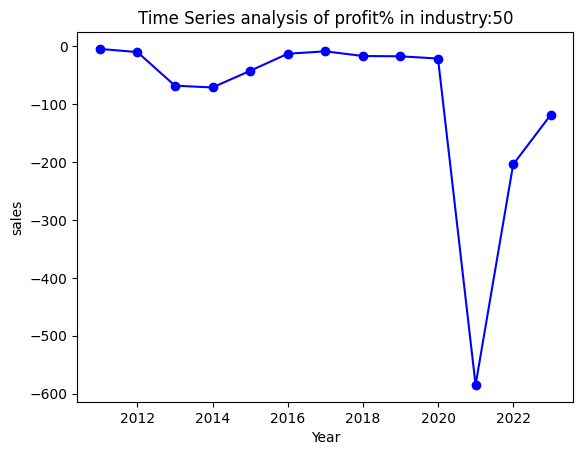

Linear Regression Equation:
Y = -48.60 + 0.01*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


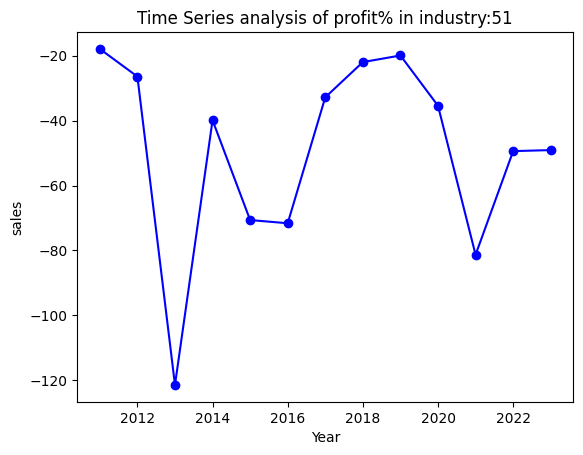

Linear Regression Equation:
Y = -216.12 + -0.10*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


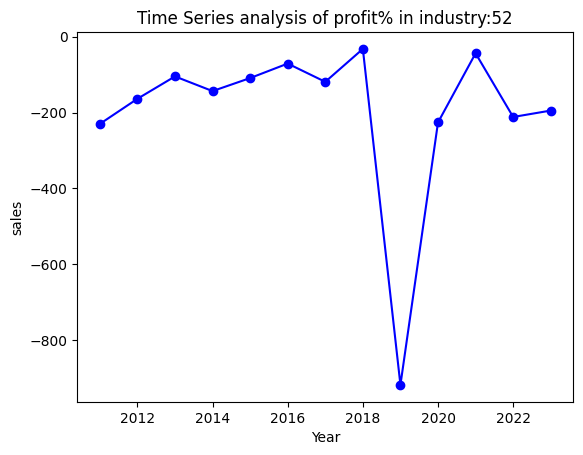

Linear Regression Equation:
Y = -68.79 + -0.10*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


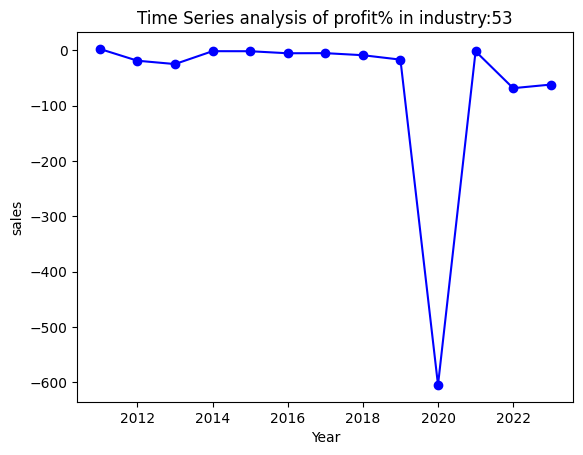

Linear Regression Equation:
Y = -45.20 + 0.31*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


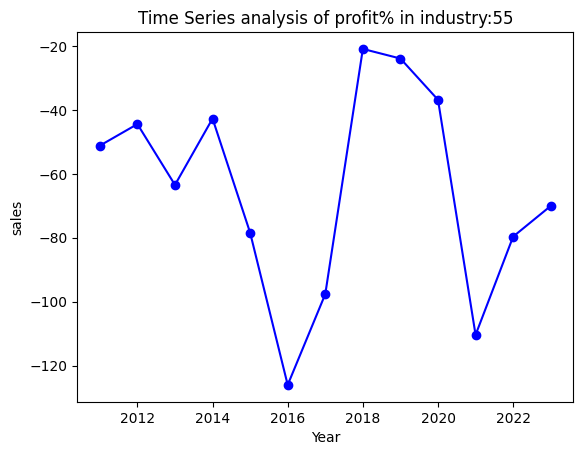

Linear Regression Equation:
Y = -51.24 + 0.44*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


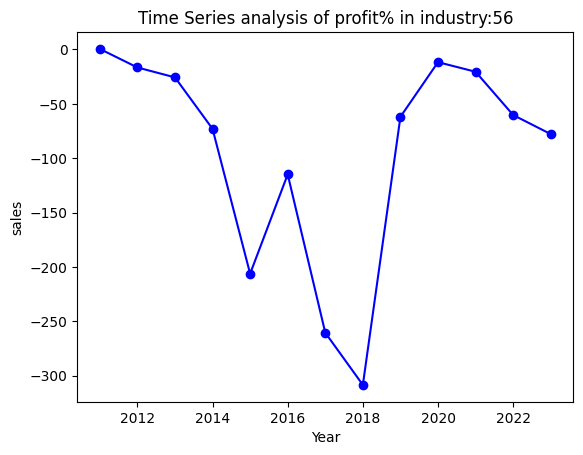

Linear Regression Equation:
Y = -11.02 + 0.37*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


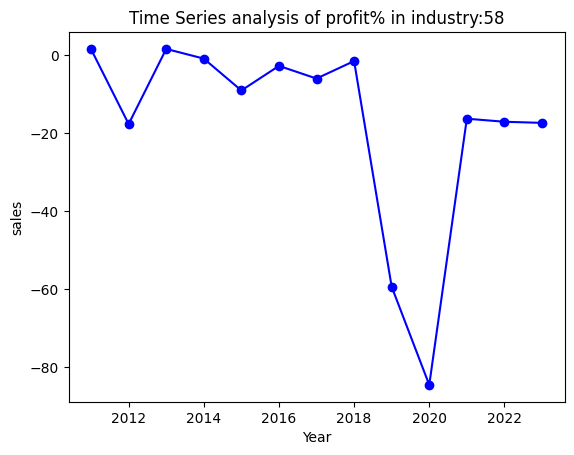

Linear Regression Equation:
Y = -195.55 + 0.05*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


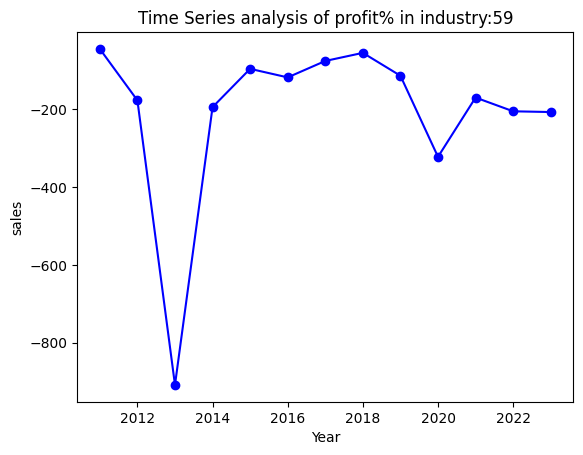

Linear Regression Equation:
Y = -99.75 + -0.01*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


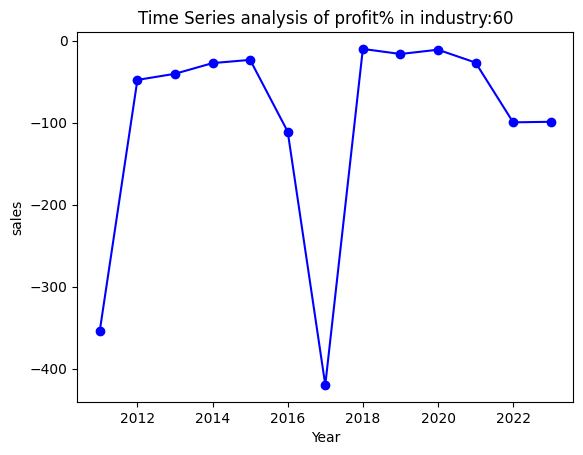

Linear Regression Equation:
Y = -171.71 + 0.32*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


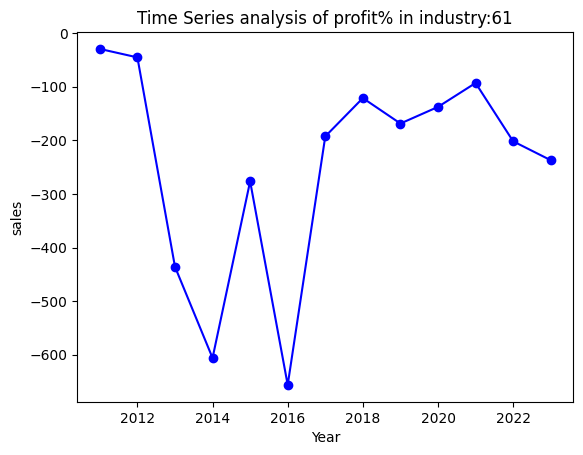

Linear Regression Equation:
Y = -47.22 + 0.35*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


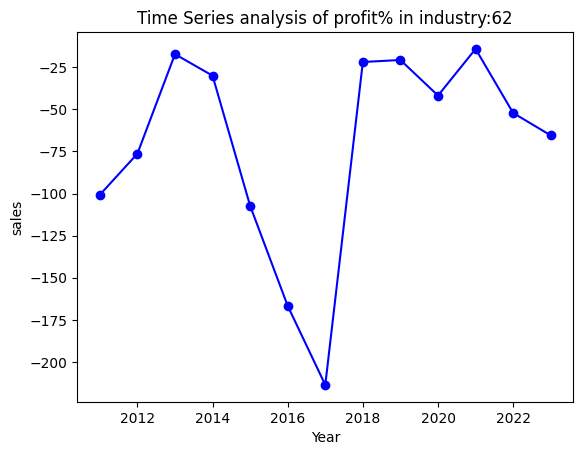

Linear Regression Equation:
Y = -44.23 + -0.24*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


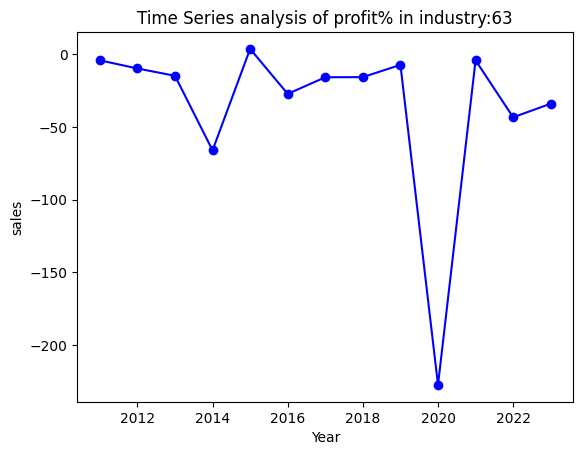

Linear Regression Equation:
Y = -516.37 + 2.13*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


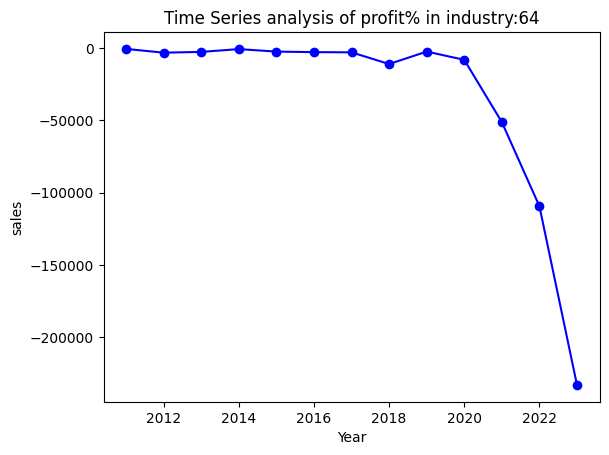

Linear Regression Equation:
Y = 16.54 + 0.00*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


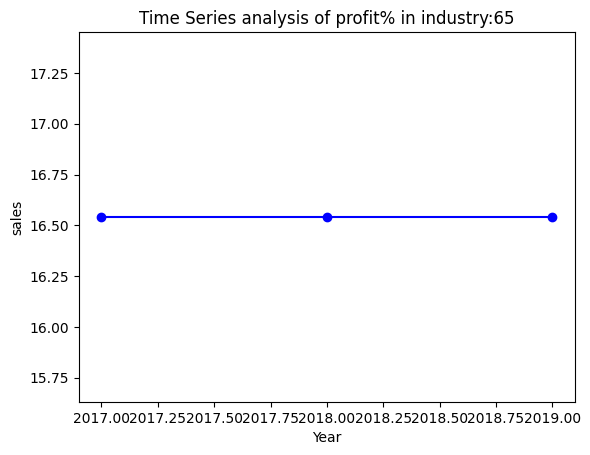

Linear Regression Equation:
Y = -430.06 + -0.12*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


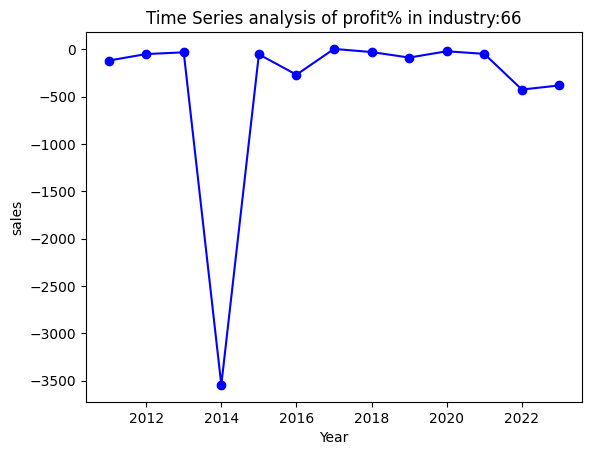

Linear Regression Equation:
Y = -57.36 + 0.09*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


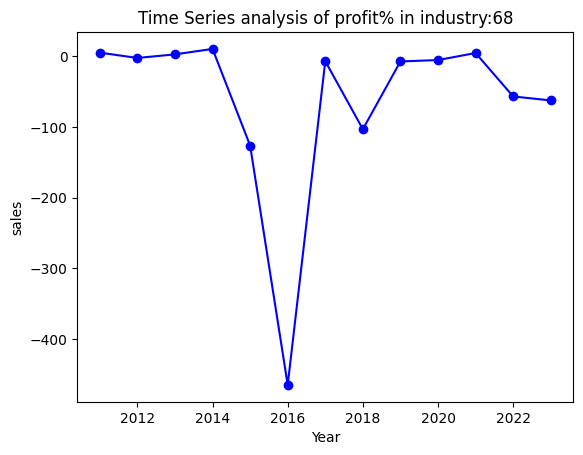

Linear Regression Equation:
Y = -106.95 + -0.26*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


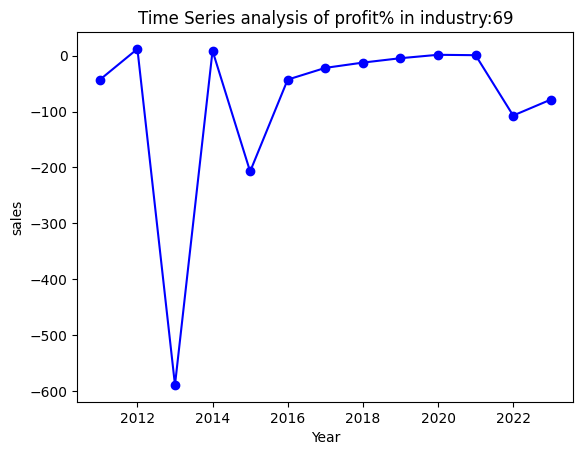

Linear Regression Equation:
Y = -977.74 + -0.16*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


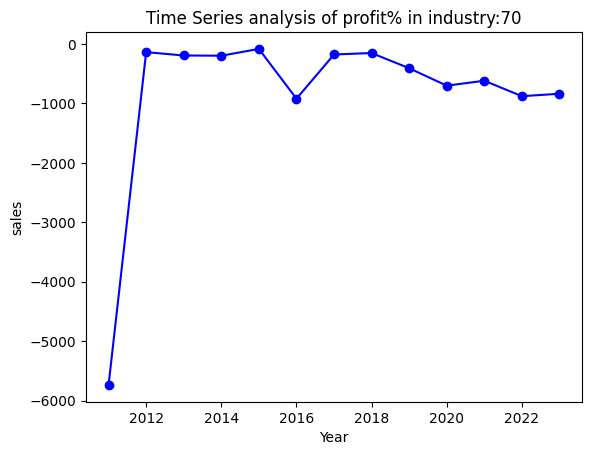

Linear Regression Equation:
Y = -55.83 + -0.19*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


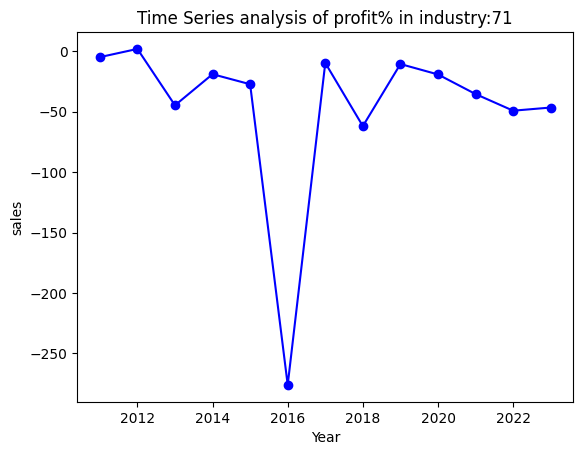

Linear Regression Equation:
Y = -255.16 + 0.12*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


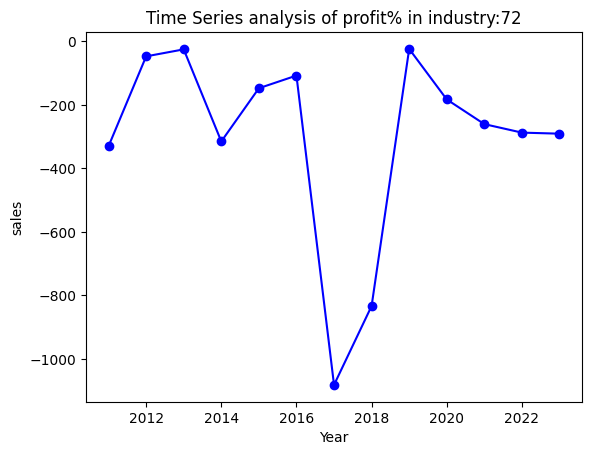

Linear Regression Equation:
Y = -19.86 + 0.68*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


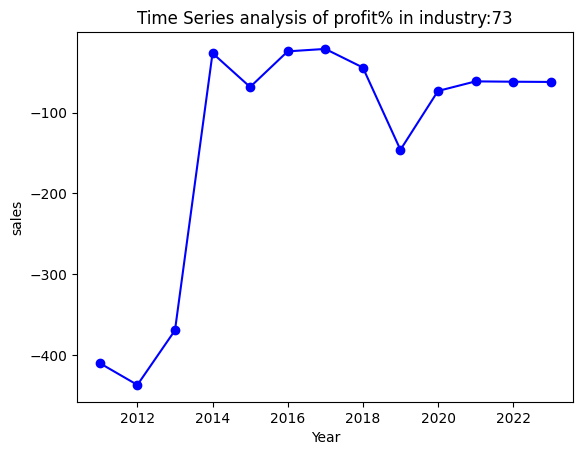

Linear Regression Equation:
Y = -701.64 + 0.19*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


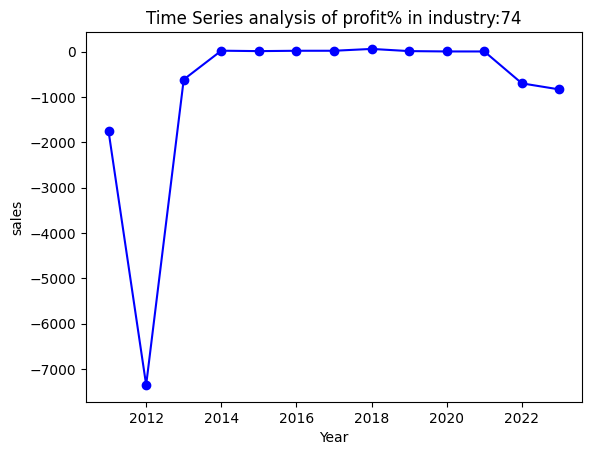

Linear Regression Equation:
Y = -19.82 + -0.12*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


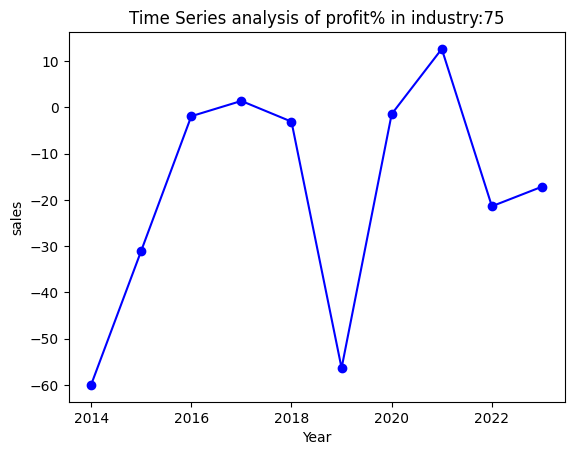

Linear Regression Equation:
Y = -941.27 + -0.31*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


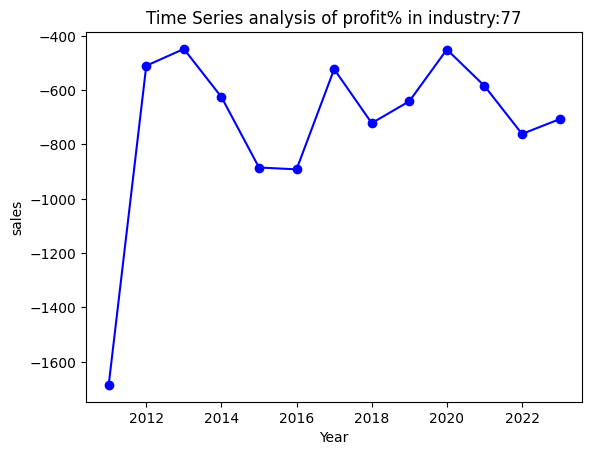

Linear Regression Equation:
Y = -123.44 + -0.16*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


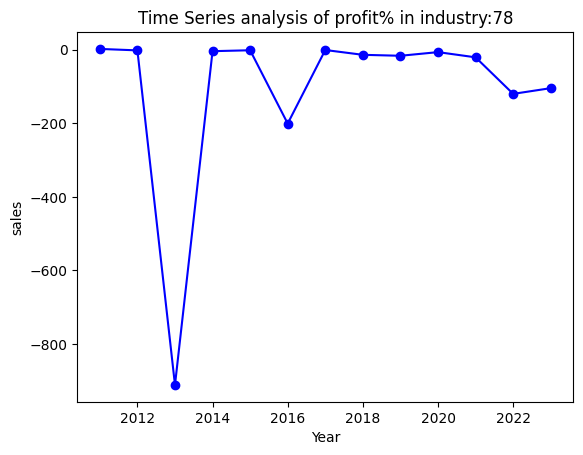

Linear Regression Equation:
Y = -55.27 + -0.07*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


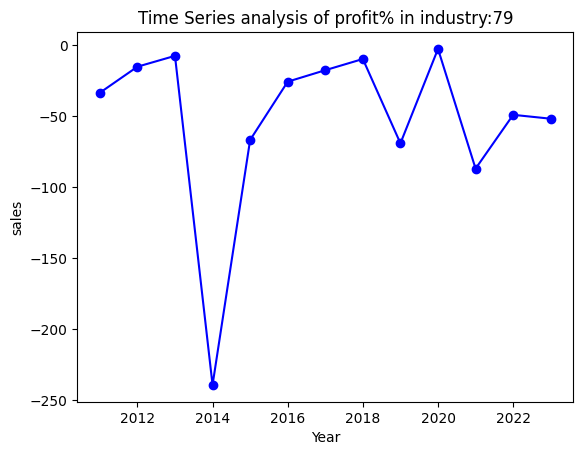

Linear Regression Equation:
Y = -6.10 + -0.06*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


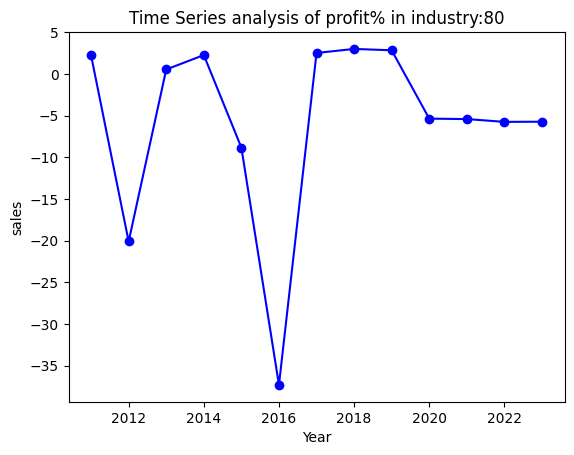

Linear Regression Equation:
Y = -98.41 + 0.19*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


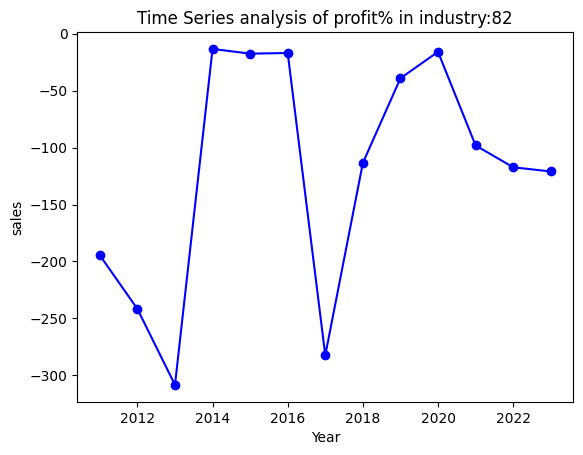

Linear Regression Equation:
Y = -4.06 + 0.01*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


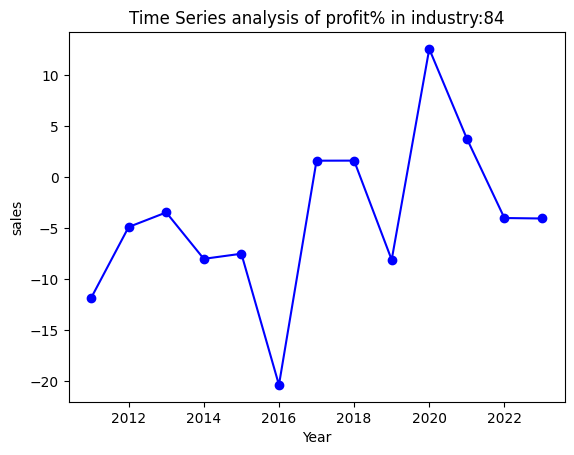

Linear Regression Equation:
Y = -125.02 + 0.03*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


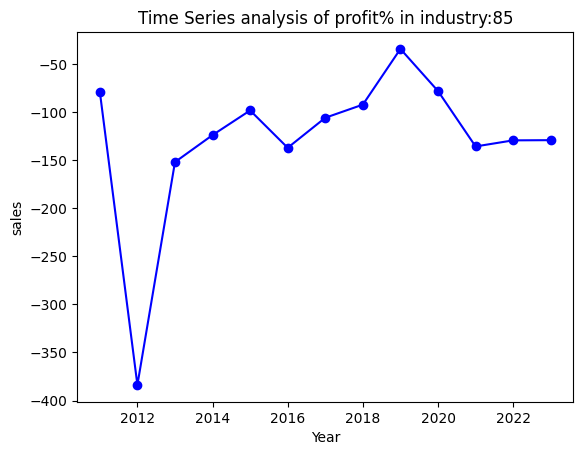

Linear Regression Equation:
Y = -44.88 + 0.10*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


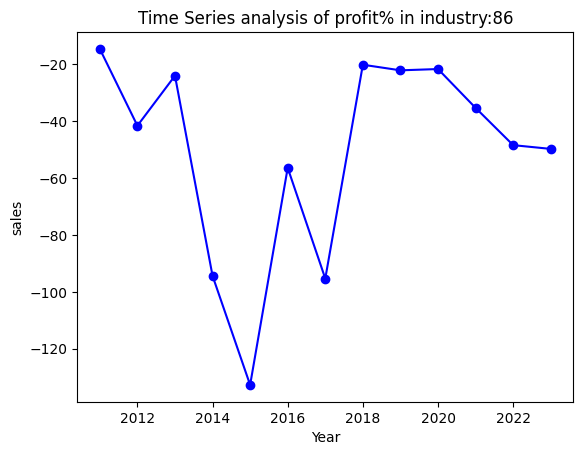

Linear Regression Equation:
Y = -24.20 + -0.13*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


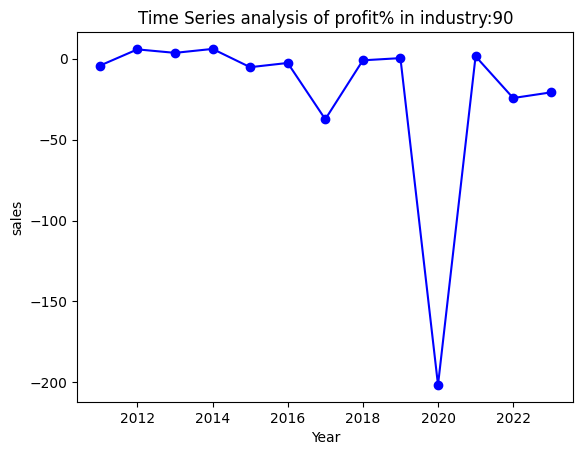

Linear Regression Equation:
Y = -299.11 + -0.13*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


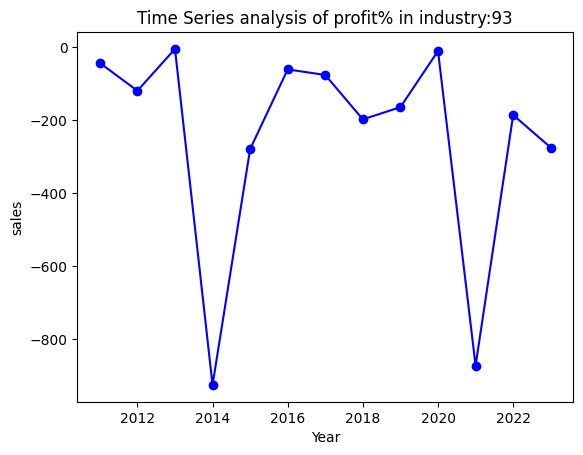

Linear Regression Equation:
Y = -25.22 + 0.44*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


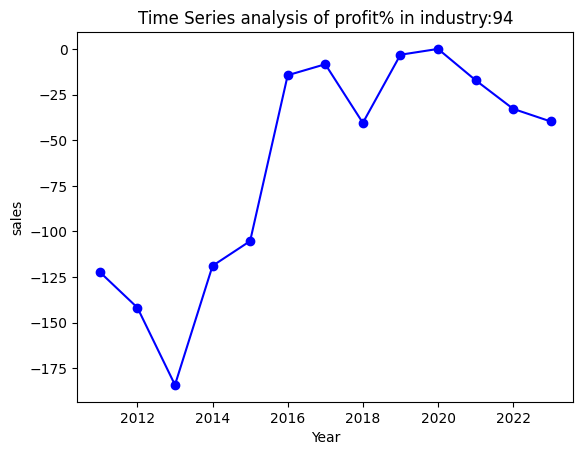

Linear Regression Equation:
Y = -141.64 + -0.11*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


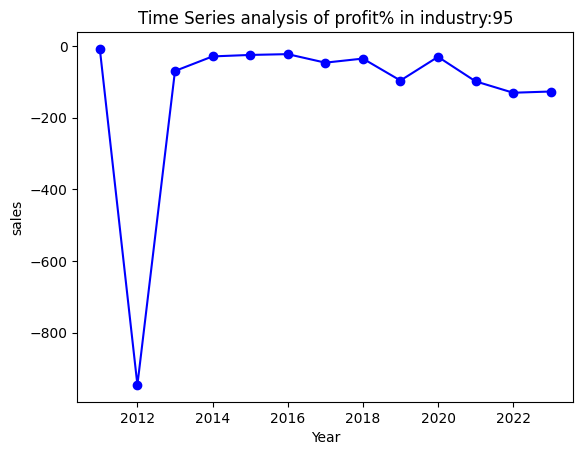

Linear Regression Equation:
Y = -1.46 + 0.31*Prev_profit%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


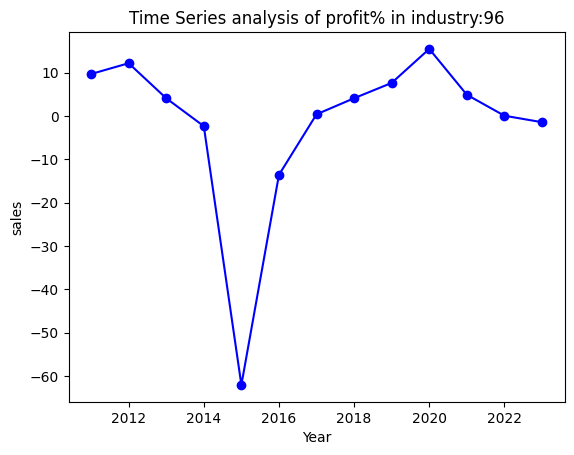

In [ ]:
time_series_data=new_fin_data.groupby(['industry_id','year'])['profit%'].mean()
time_series_data=time_series_data.to_frame()
time_series_data.reset_index(inplace=True)
time_series_data['industry_id'] = time_series_data['industry_id'].astype(str)
time_series_data['pre_profit%'] = time_series_data['profit%'].shift(1)
time_series_data.loc[time_series_data['year'] == 2010, 'pre_profit%'] = np.nan
time_series_data.dropna(inplace=True)
industries=time_series_data['industry_id'].unique()
for industry in industries:
  inp_dat=[]
  oup_dat=[]
  industry_data=time_series_data[time_series_data['industry_id']==industry]
  X=industry_data[['pre_profit%']]
  y=industry_data['profit%']
  model=LinearRegression()
  model.fit(X,y)
  intercept = model.intercept_
  coefficients = model.coef_
  print("Linear Regression Equation:")
  print(f"Y = {intercept:.2f} + {coefficients[0]:.2f}*Prev_profit%")
  inp_dat=industry_data['pre_profit%'].tolist()
  oup_dat=industry_data['profit%'].tolist()
  year=industry_data['year'].tolist()
  for i in range(2):
    inp_dat.append(oup_dat[-1])
    last_input_value = inp_dat[-1]
    predicted_output = model.predict([[last_input_value]])[0]
    oup_dat.append(predicted_output)
    year.append(year[-1]+1)
  plt.plot(year, oup_dat, marker='o', color='b')
  plt.title(f"Time Series analysis of profit% in industry:{industry}")
  plt.xlabel('Year')
  plt.ylabel('sales')
  plt.show()

In [ ]:
print(new_fin_data['sales'].max())
print(new_fin_data['sales'].min())
print(new_fin_data['profit%'].max())
print(new_fin_data['profit%'].min())

6157826.0
-739.6
13756.521739130434
-15106500.0


In [ ]:
#sesitivity analysis of sales with respect to selling and distribution expenses in industry 1
distexp=[100302.37, 95023.30, 89744.22, 84465.15, 79186.08, 73907.01, 68627.94,105581.44,110860.51, 116139.58, 121418.66, 126697.73, 131976.80, 137255.87, 142534.94]
result_sales=[]
for i in distexp:
  ans=445.673402+18.021292*i-216.888985
  result_sales.append(ans)
sens={
    "Selling and Distribution Expenses":distexp,
    "Sales":result_sales
}
sens_df=pd.DataFrame(sens)
sens_df

Selling and Distribution Expenses         Sales
0                           100302.37  1.807807e+06
1                            95023.30  1.712671e+06
2                            89744.22  1.617536e+06
3                            84465.15  1.522400e+06
4                            79186.08  1.427264e+06
5                            73907.01  1.332129e+06
6                            68627.94  1.236993e+06
7                           105581.44  1.902943e+06
8                           110860.51  1.998078e+06
9                           116139.58  2.093214e+06
10                          121418.66  2.188350e+06
11                          126697.73  2.283486e+06
12                          131976.80  2.378621e+06
13                          137255.87  2.473757e+06
14                          142534.94  2.568893e+06